In [18]:
# Command to reload all modules before executing the code
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# ML libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
import os
import sys
from collections import defaultdict
from tqdm import tqdm
import warnings
from typing import List, Dict, Any, Tuple, Union, Optional, Callable, TypeVar
# Project modules
from data_loading import load_dataframe_teamfeatures

warnings.filterwarnings('ignore')

# Comparison of the distributions among the same metric

In this notebook, we compare the distributions (in terms of normalized L1 difference) of features representing the aggregated version of the same metric.

## Team features

In [20]:
df_teamfeatures_train = load_dataframe_teamfeatures('train')

In [21]:
# Example of distribution difference

from data_analysis import compute_distribution_difference

metric_name = 'HOME_TEAM_SHOTS_OFF_TARGET'
compute_distribution_difference(
    feature_serie1=df_teamfeatures_train[f'{metric_name}_season_sum'],
    feature_serie2=df_teamfeatures_train[f'{metric_name}_season_average'],
    n_monte_carlo=200,
)

{'l1_loss': {'loss_value': 0.009931058943494936,
  'estimated_typical_loss_value': 0.0026716691420422224,
  'loss_value_normalized': 3.7171739521244818},
 'l2_loss': {'loss_value': 0.00023254748251791622,
  'estimated_typical_loss_value': 1.3297038888242132e-05,
  'loss_value_normalized': 17.488666797813337},
 'kl_divergence': {'loss_value': nan,
  'estimated_typical_loss_value': nan,
  'loss_value_normalized': nan},
 'sum_ratio_abs_diff': {'loss_value': 0.113537935142118,
  'estimated_typical_loss_value': 0.030489157478457,
  'loss_value_normalized': 3.723879061674325}}

We plot the difference matrix (in terms of normalized L1 difference) of the different aggregated features related to the same metric. We plot such a matrix for each metric.

Metric: HOME_TEAM_SHOTS_TOTAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


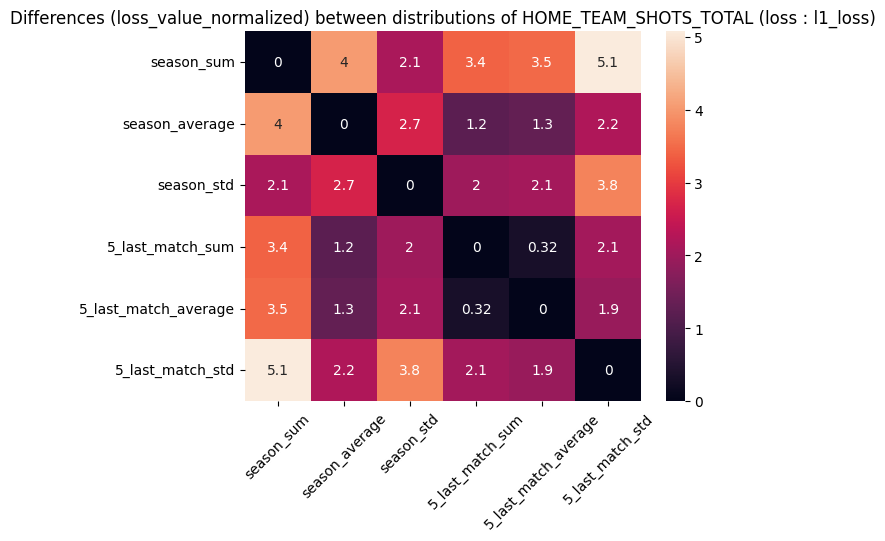

Metric: HOME_TEAM_SHOTS_INSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


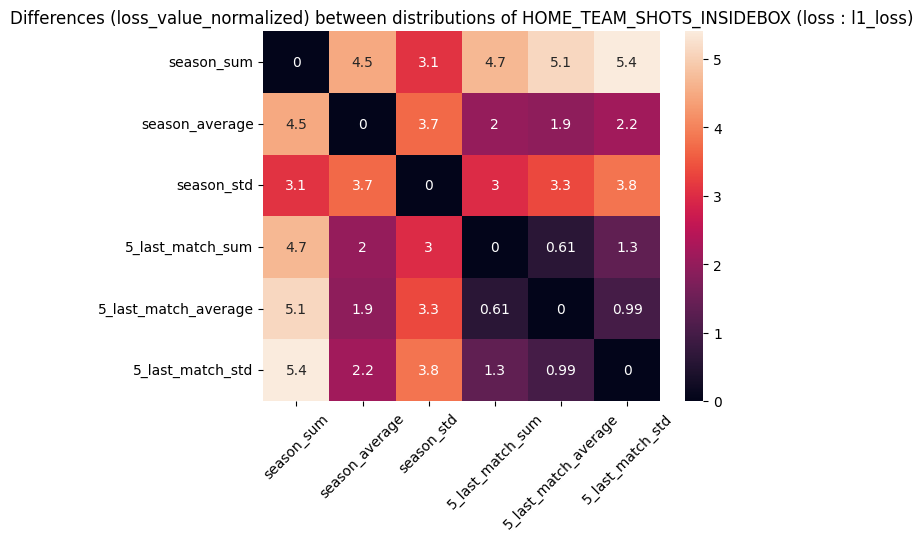

Metric: HOME_TEAM_SHOTS_OFF_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


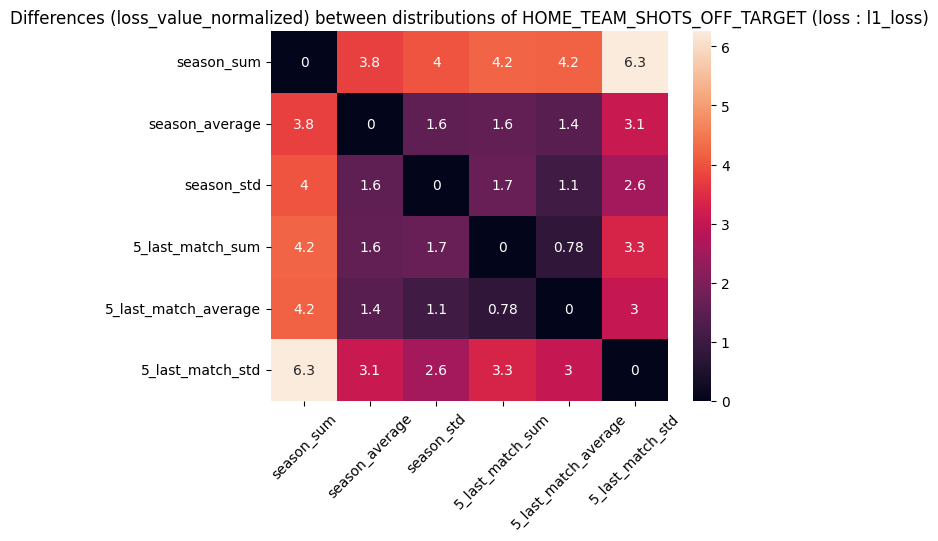

Metric: HOME_TEAM_SHOTS_ON_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


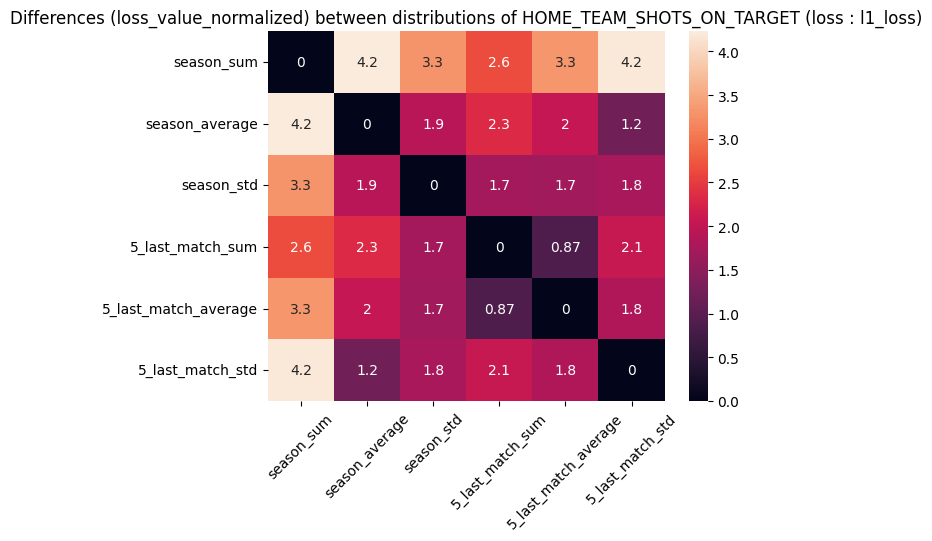

Metric: HOME_TEAM_SHOTS_OUTSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


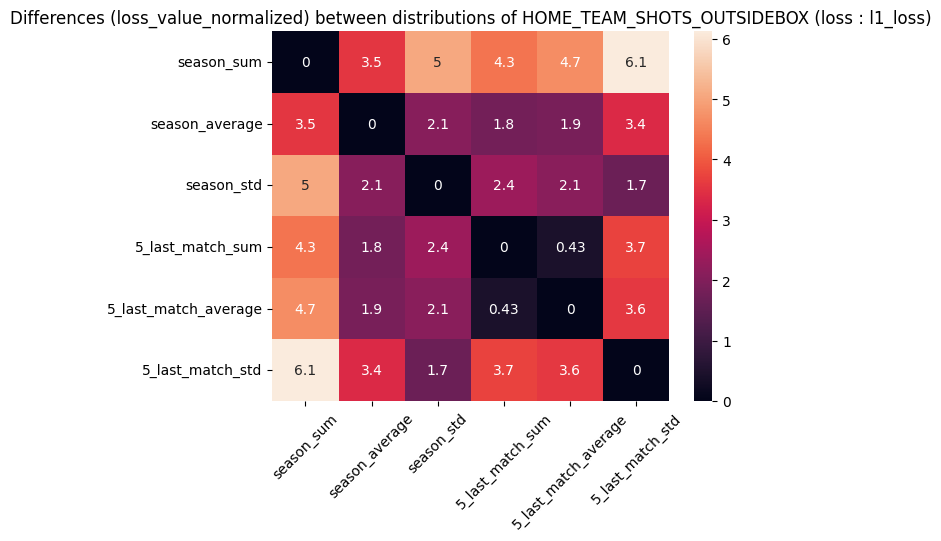

Metric: HOME_TEAM_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


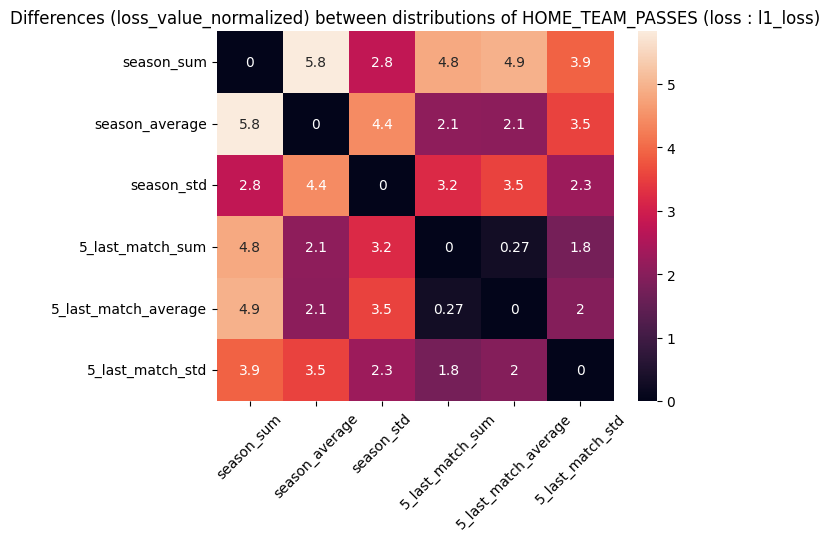

Metric: HOME_TEAM_SUCCESSFUL_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


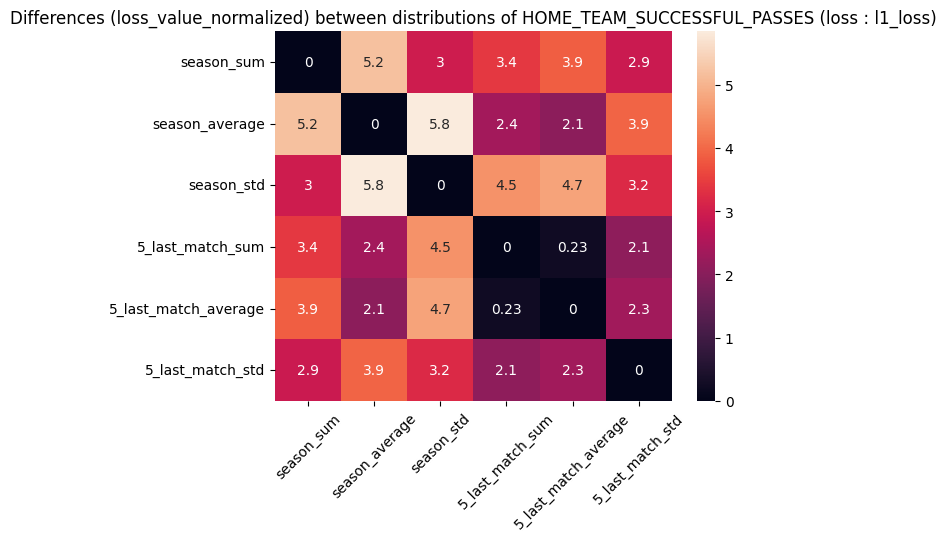

Metric: HOME_TEAM_SAVES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


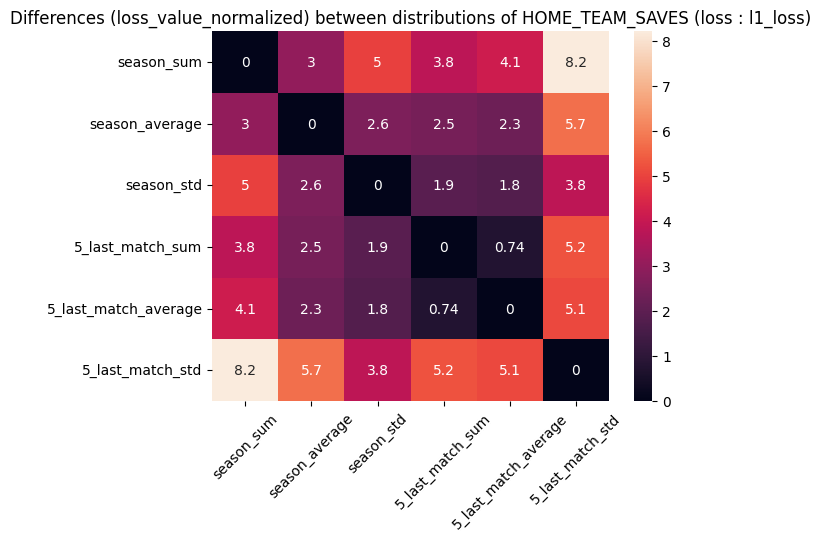

Metric: HOME_TEAM_CORNERS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


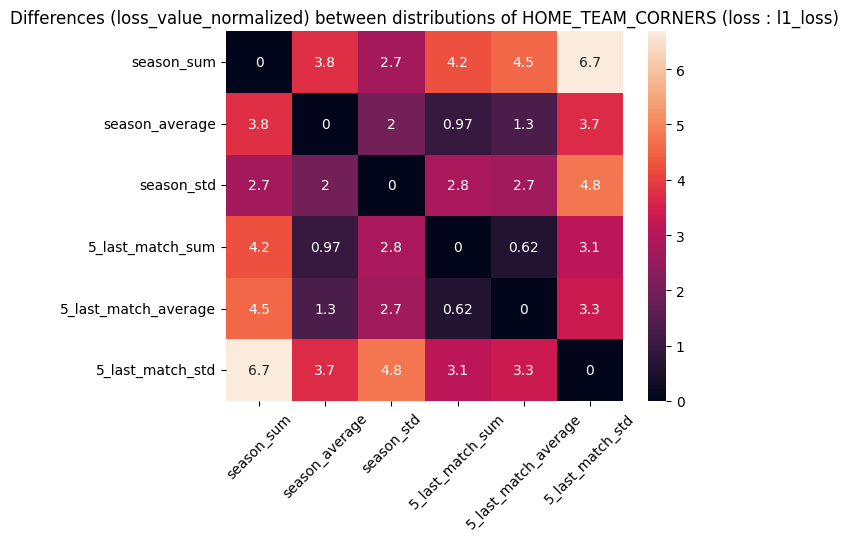

Metric: HOME_TEAM_FOULS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


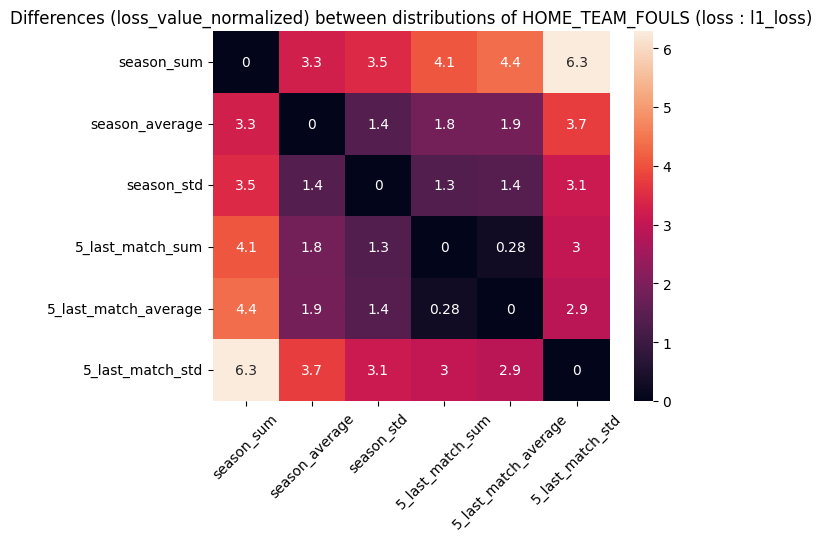

Metric: HOME_TEAM_YELLOWCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


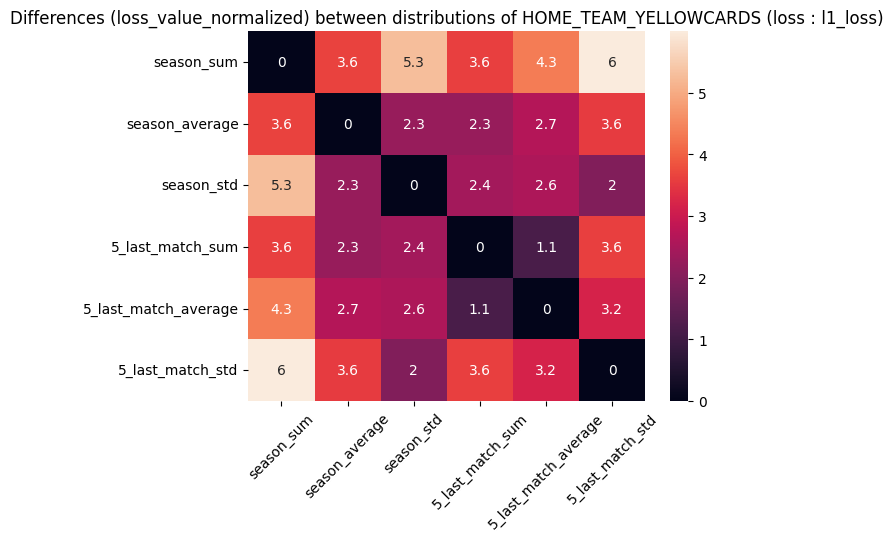

Metric: HOME_TEAM_REDCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


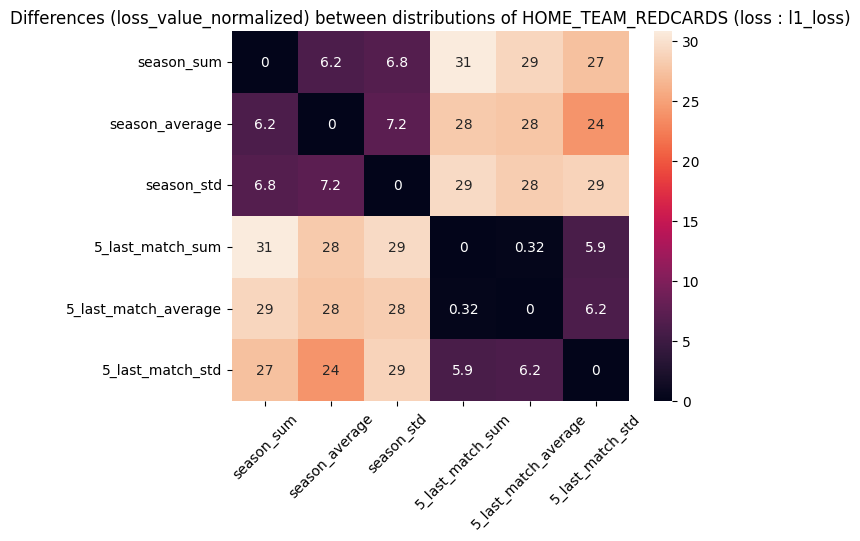

Metric: HOME_TEAM_OFFSIDES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


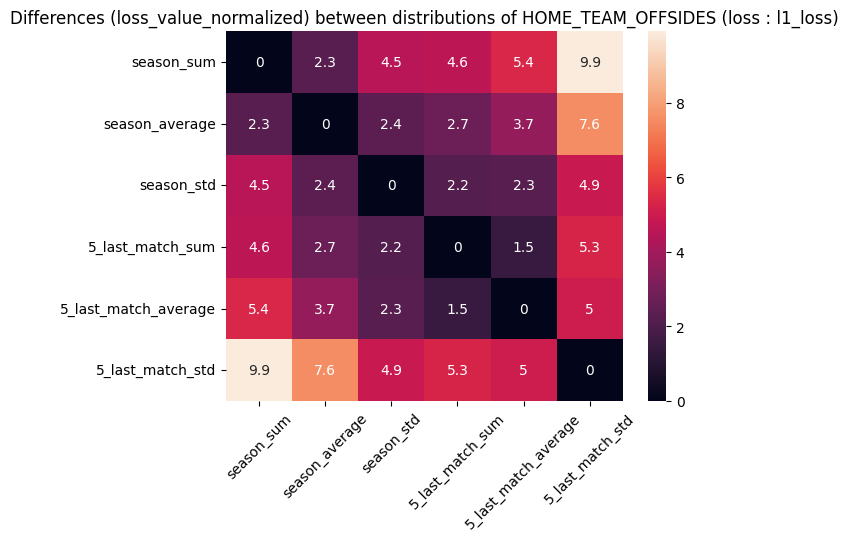

Metric: HOME_TEAM_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


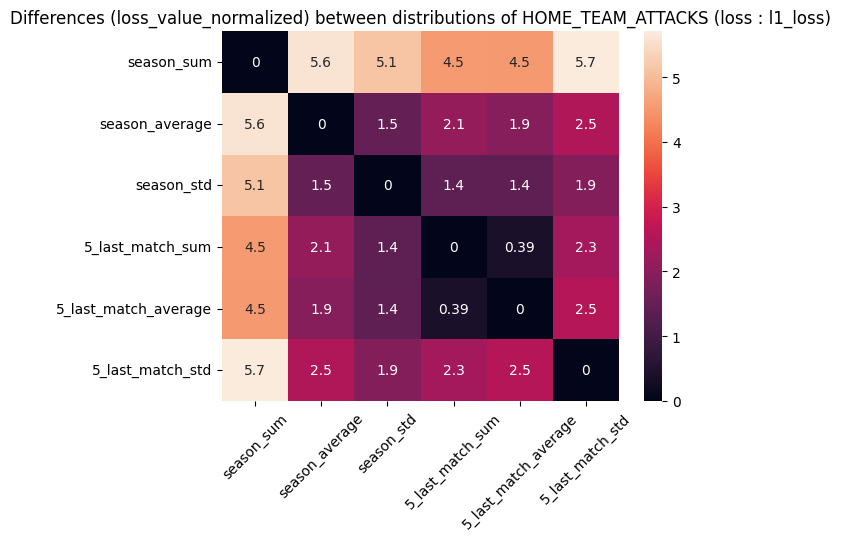

Metric: HOME_TEAM_PENALTIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


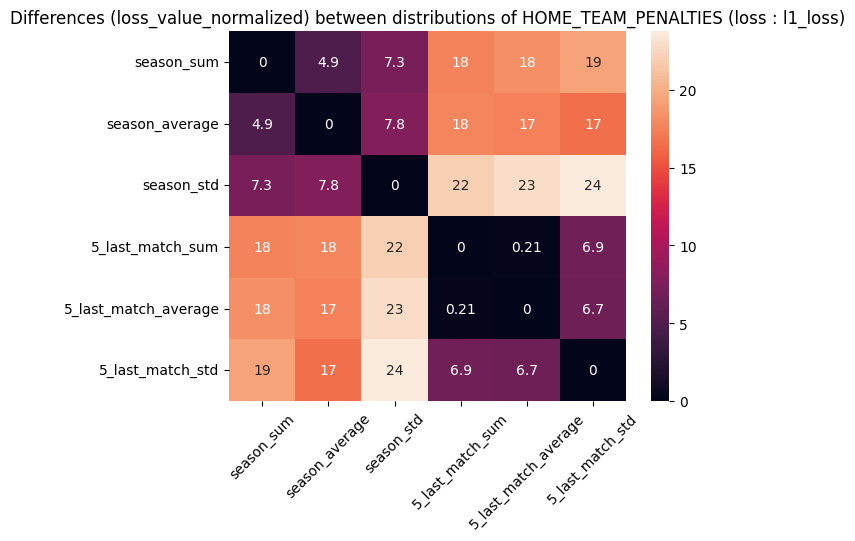

Metric: HOME_TEAM_SUBSTITUTIONS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


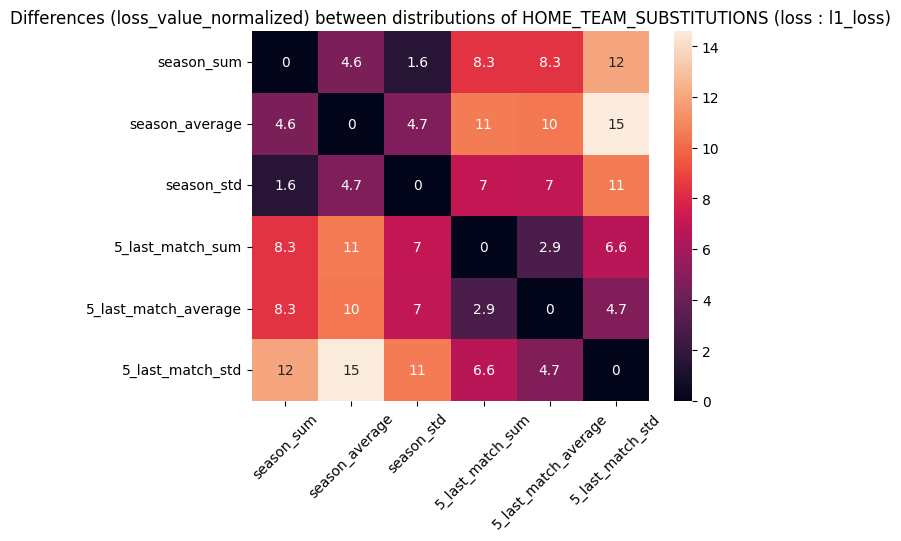

Metric: HOME_TEAM_BALL_SAFE
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


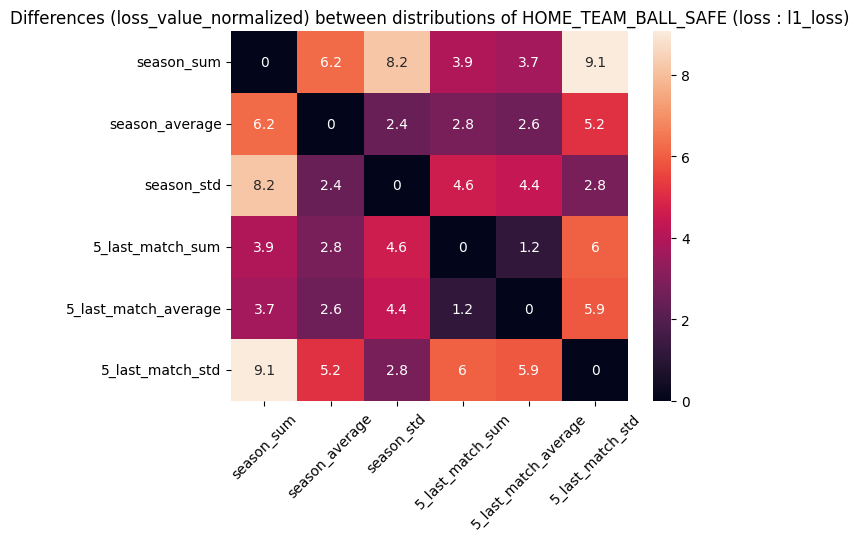

Metric: HOME_TEAM_DANGEROUS_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


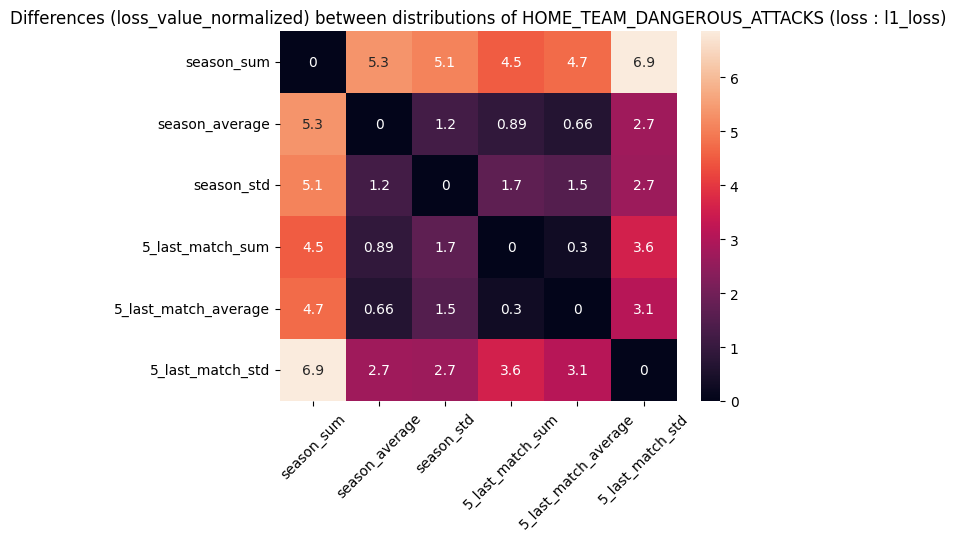

Metric: HOME_TEAM_INJURIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


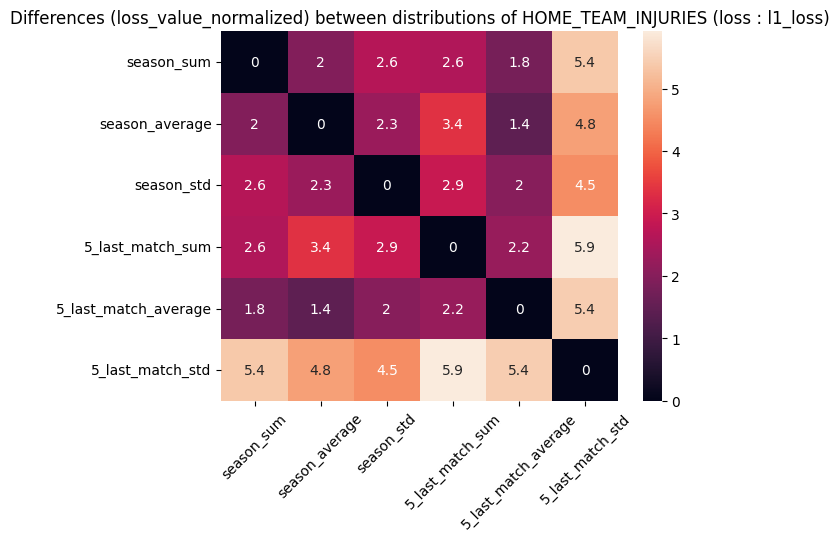

Metric: HOME_TEAM_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


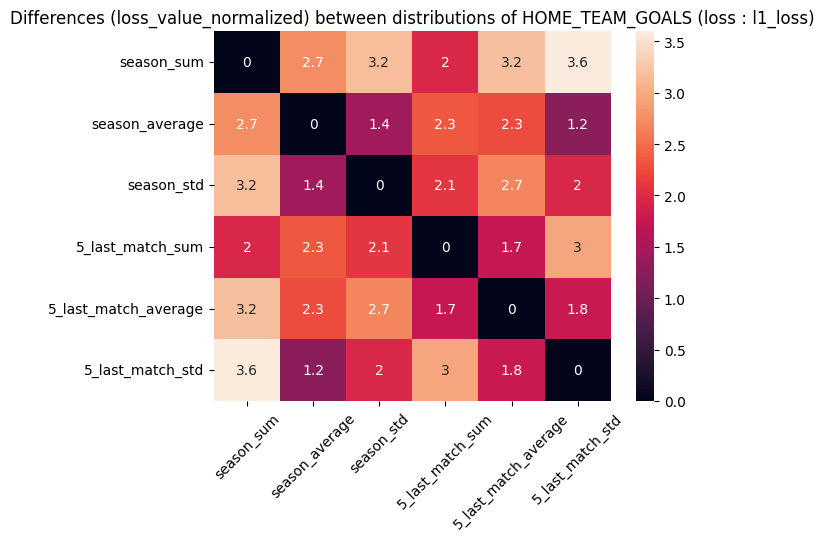

Metric: HOME_TEAM_GAME_WON
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


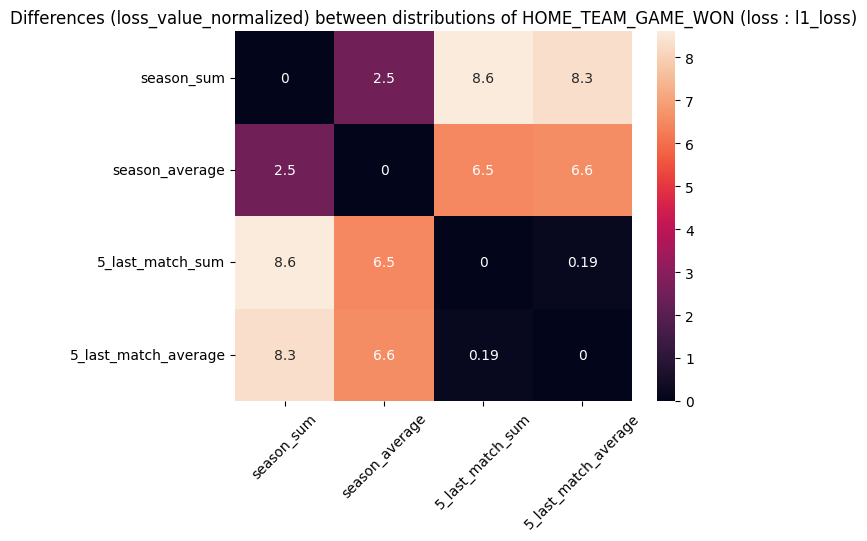

Metric: HOME_TEAM_GAME_DRAW
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


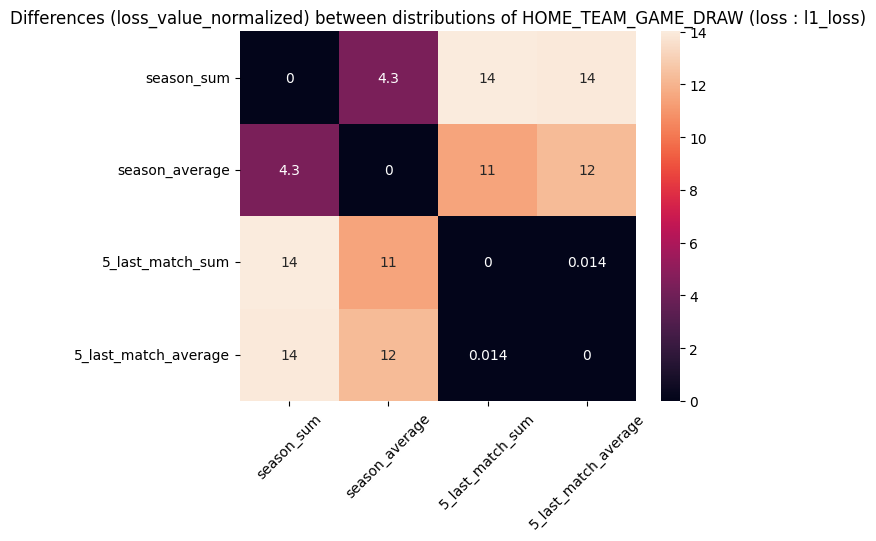

Metric: HOME_TEAM_GAME_LOST
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


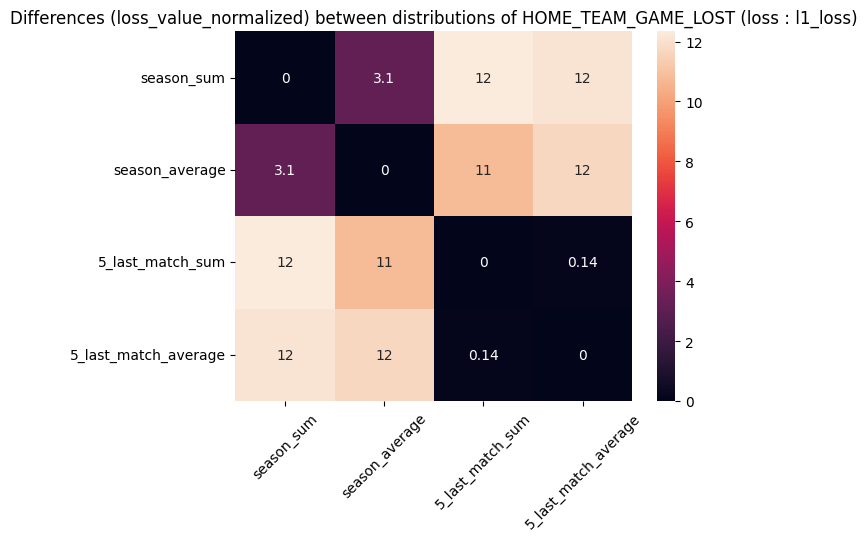

Metric: HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


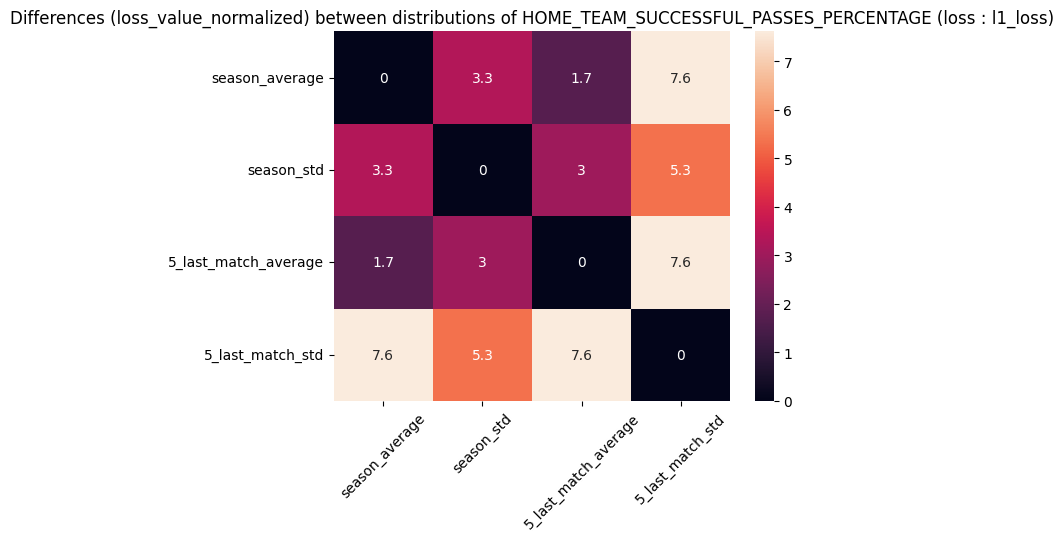

Metric: HOME_TEAM_BALL_POSSESSION
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


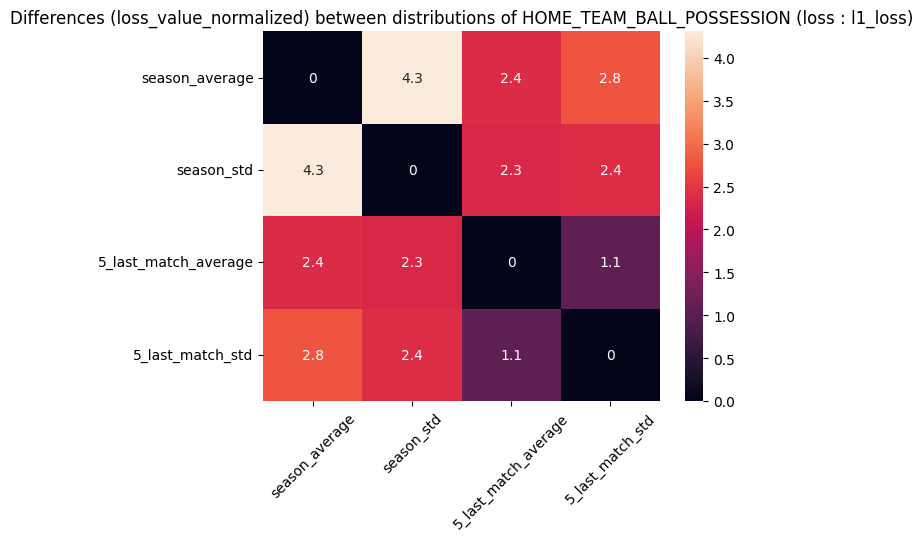

Metric: AWAY_TEAM_SHOTS_TOTAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


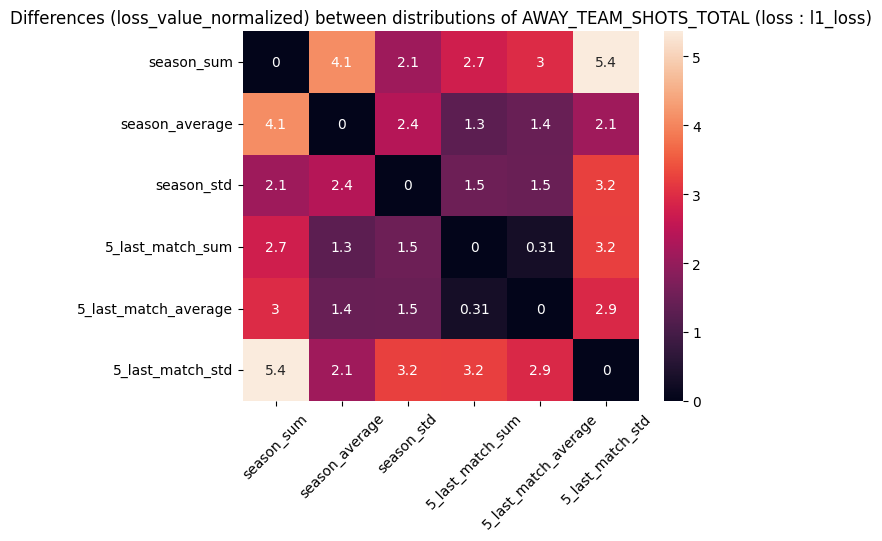

Metric: AWAY_TEAM_SHOTS_INSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


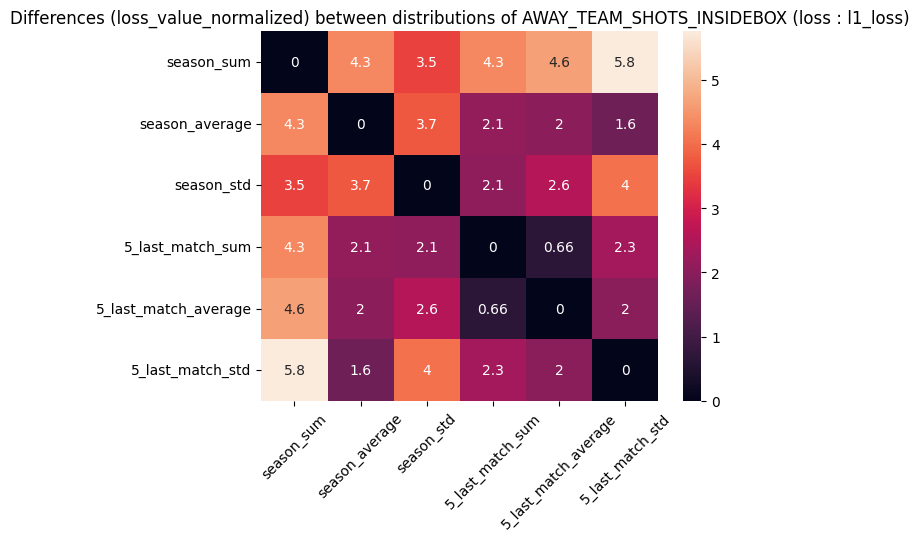

Metric: AWAY_TEAM_SHOTS_OFF_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


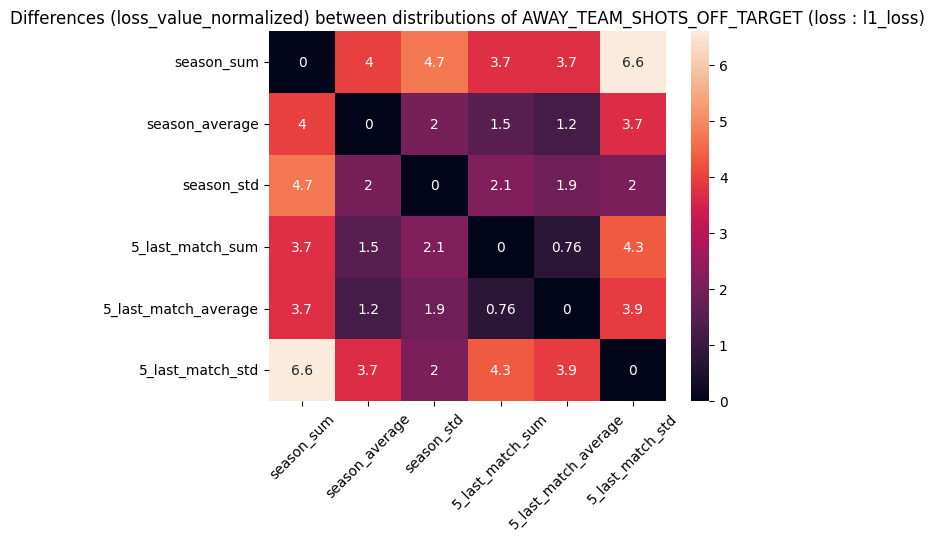

Metric: AWAY_TEAM_SHOTS_ON_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


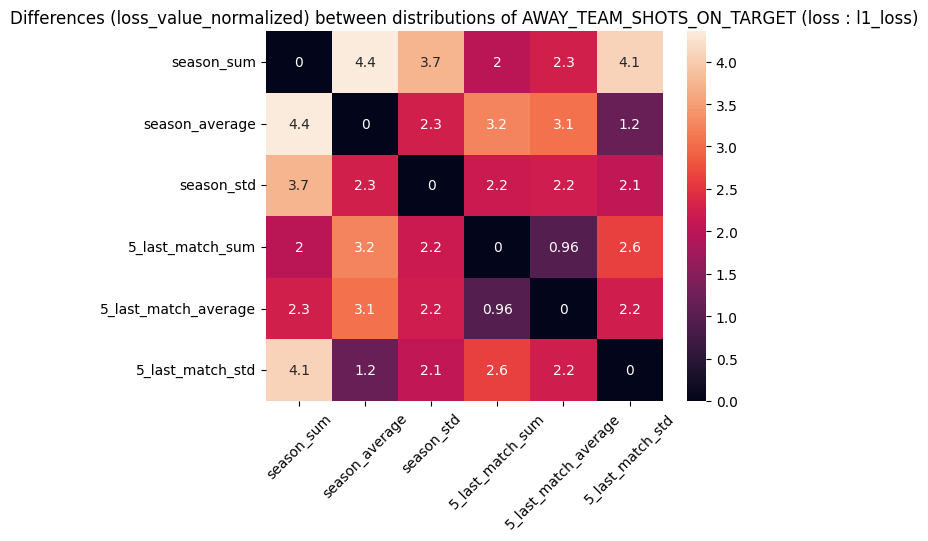

Metric: AWAY_TEAM_SHOTS_OUTSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


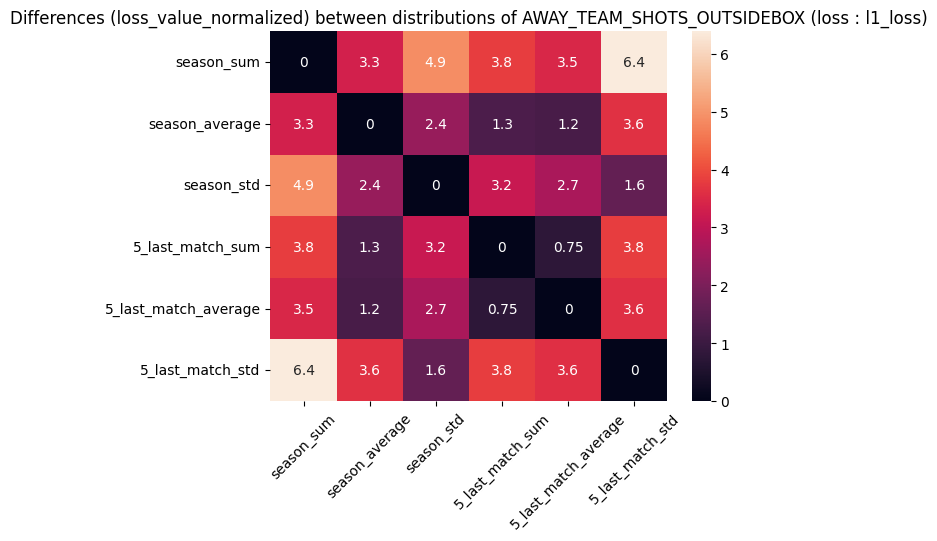

Metric: AWAY_TEAM_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


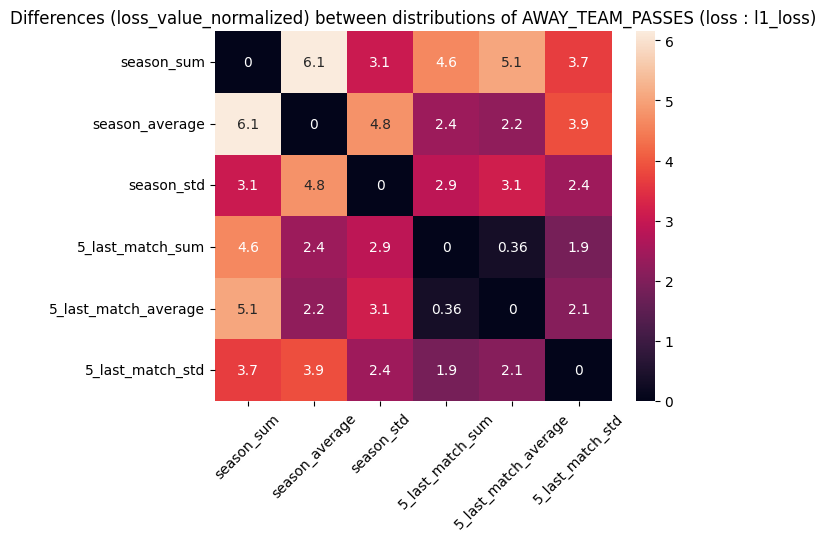

Metric: AWAY_TEAM_SUCCESSFUL_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


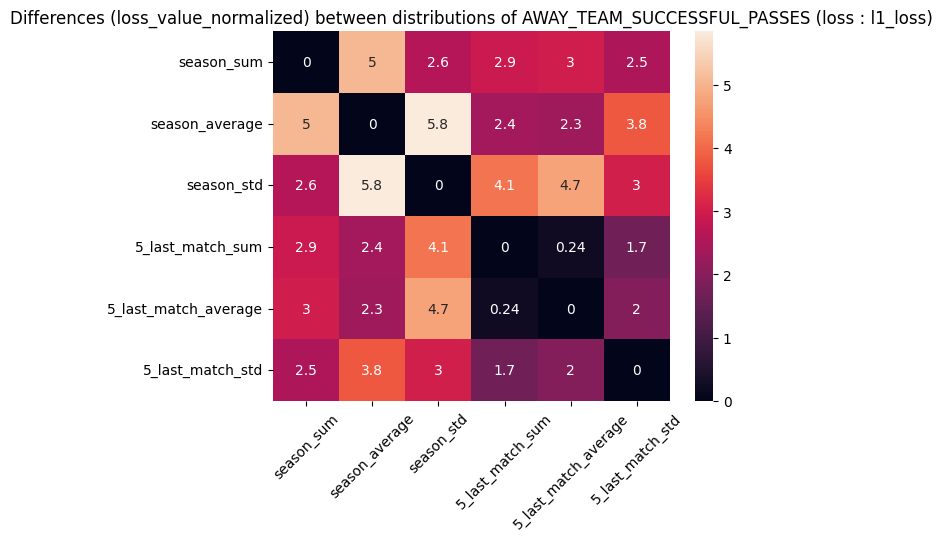

Metric: AWAY_TEAM_SAVES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


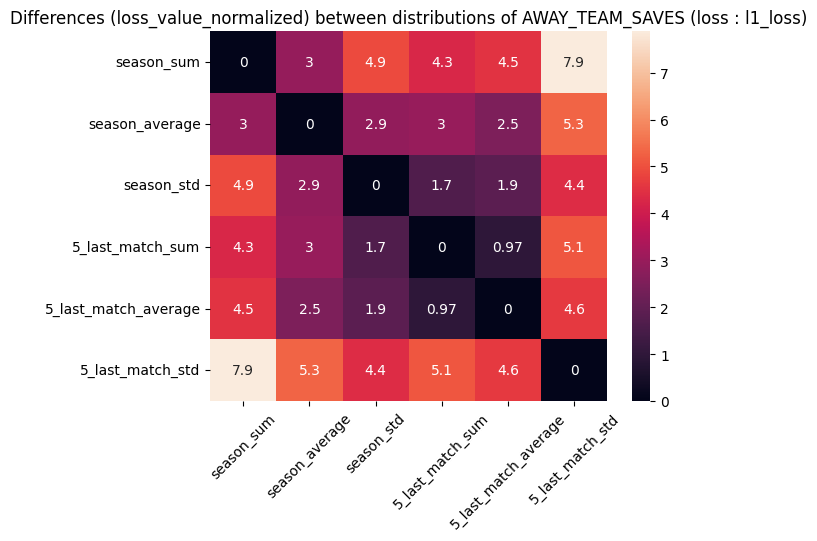

Metric: AWAY_TEAM_CORNERS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


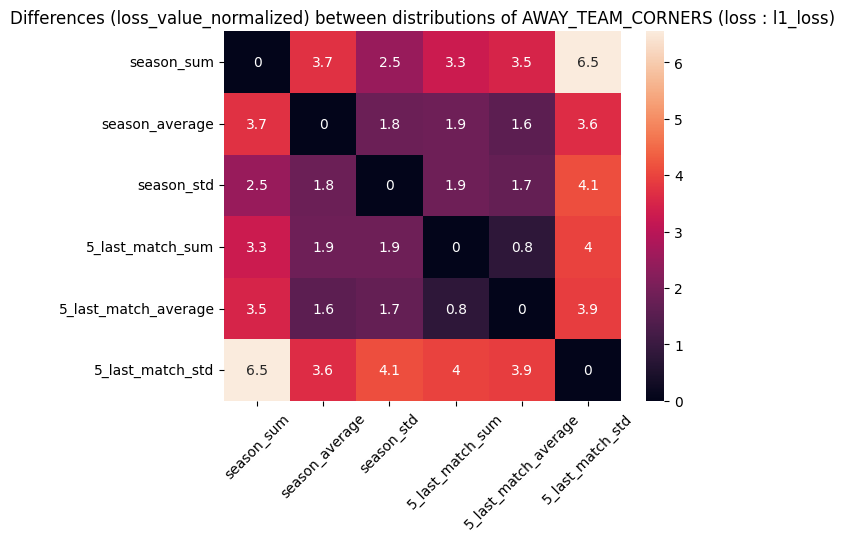

Metric: AWAY_TEAM_FOULS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


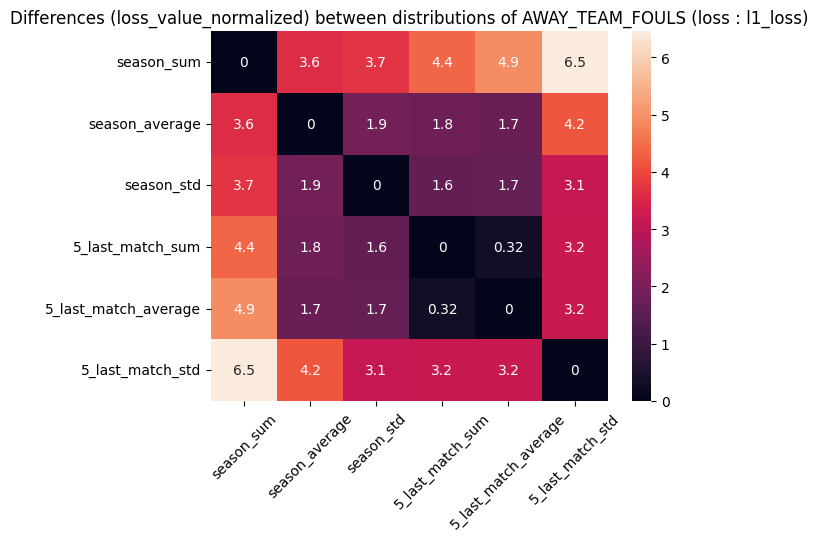

Metric: AWAY_TEAM_YELLOWCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


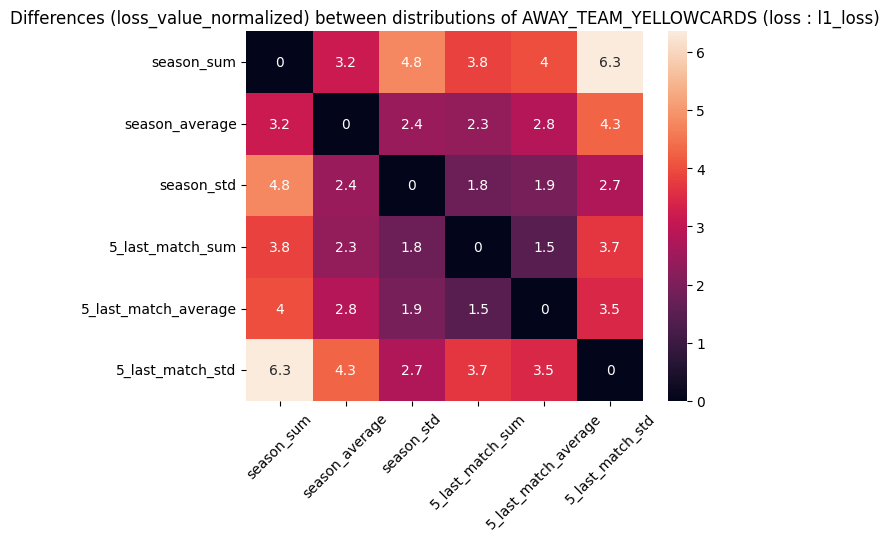

Metric: AWAY_TEAM_REDCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


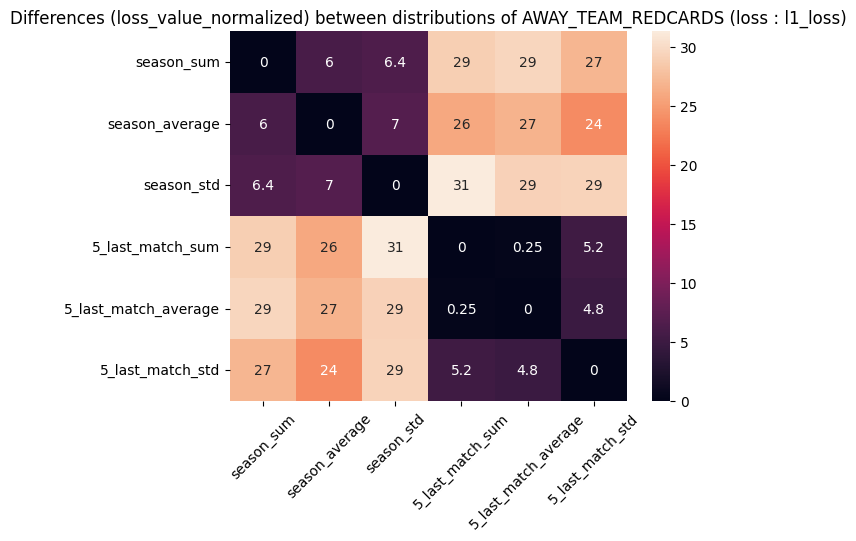

Metric: AWAY_TEAM_OFFSIDES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


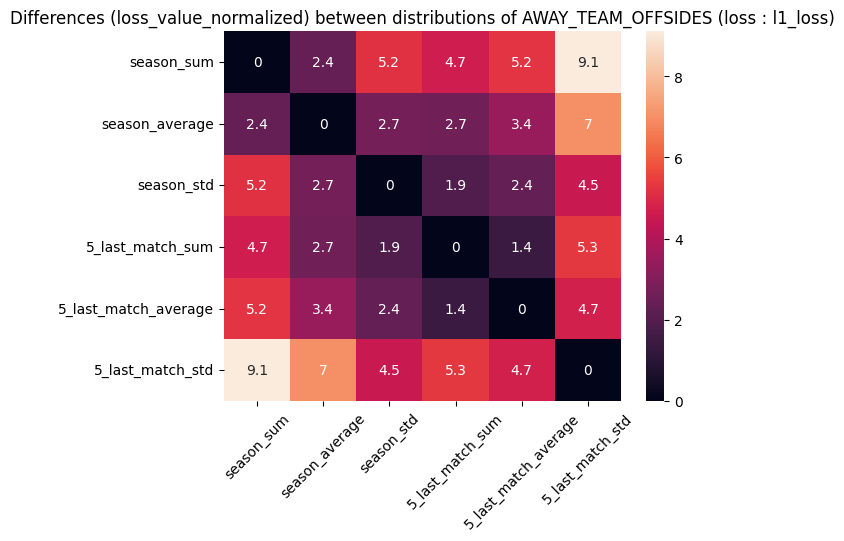

Metric: AWAY_TEAM_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


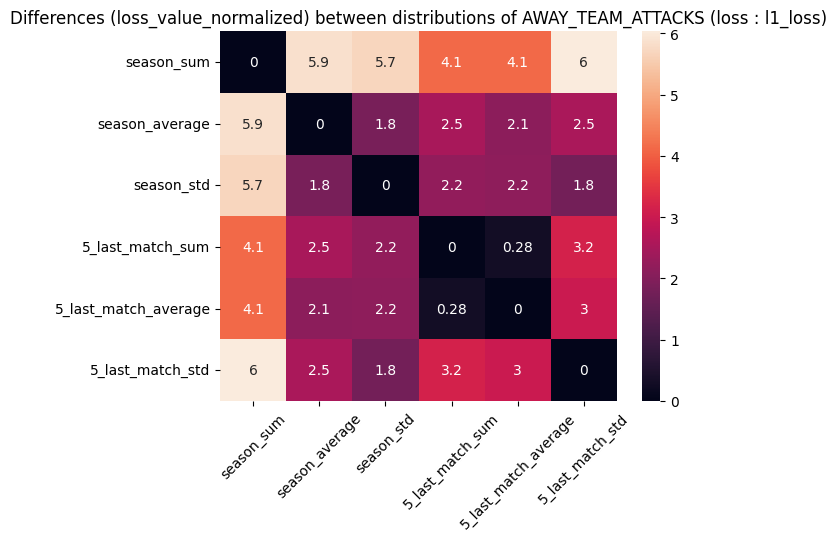

Metric: AWAY_TEAM_PENALTIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


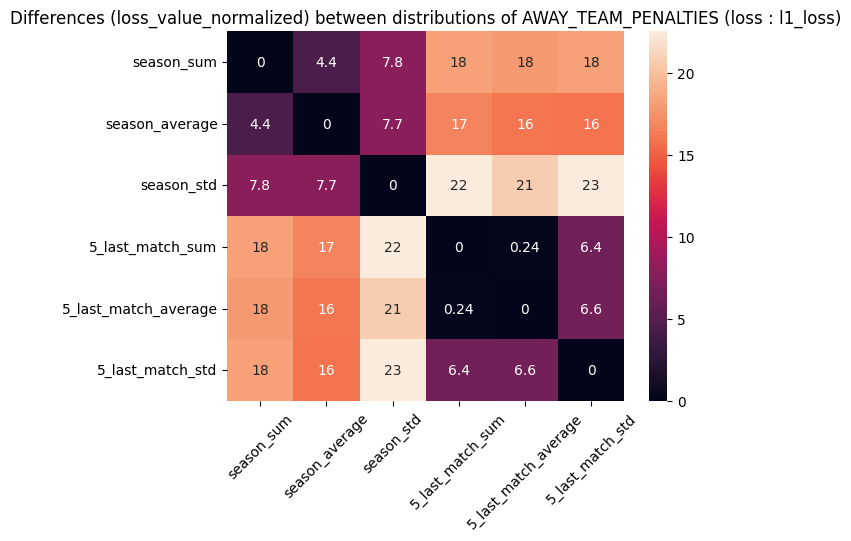

Metric: AWAY_TEAM_SUBSTITUTIONS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


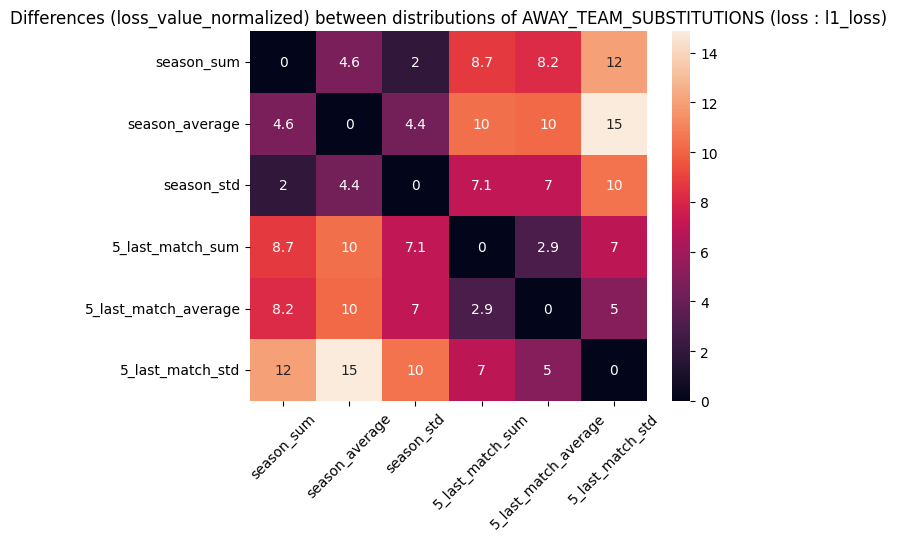

Metric: AWAY_TEAM_BALL_SAFE
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


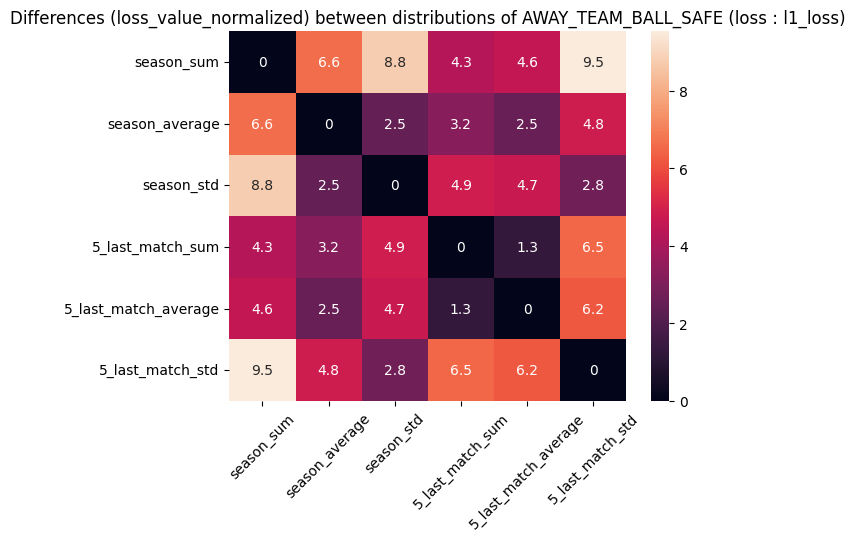

Metric: AWAY_TEAM_DANGEROUS_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


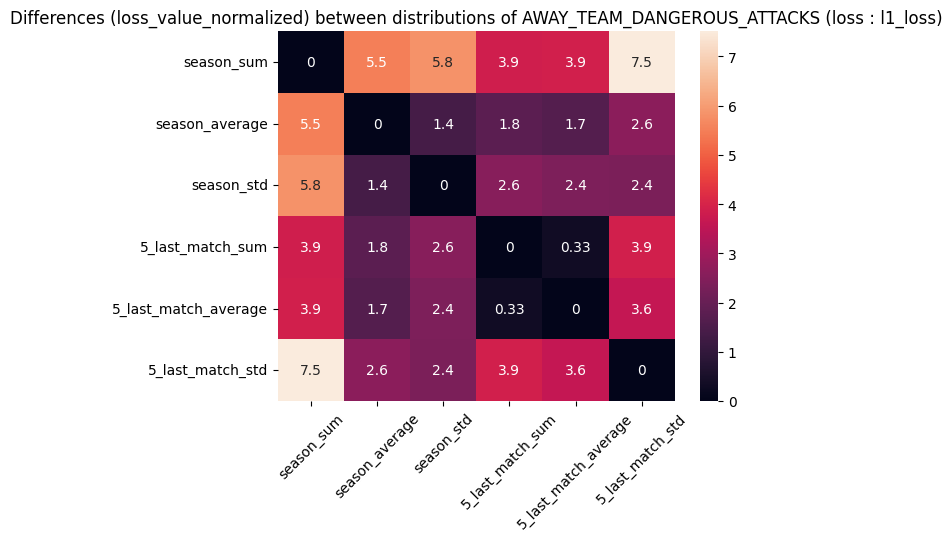

Metric: AWAY_TEAM_INJURIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


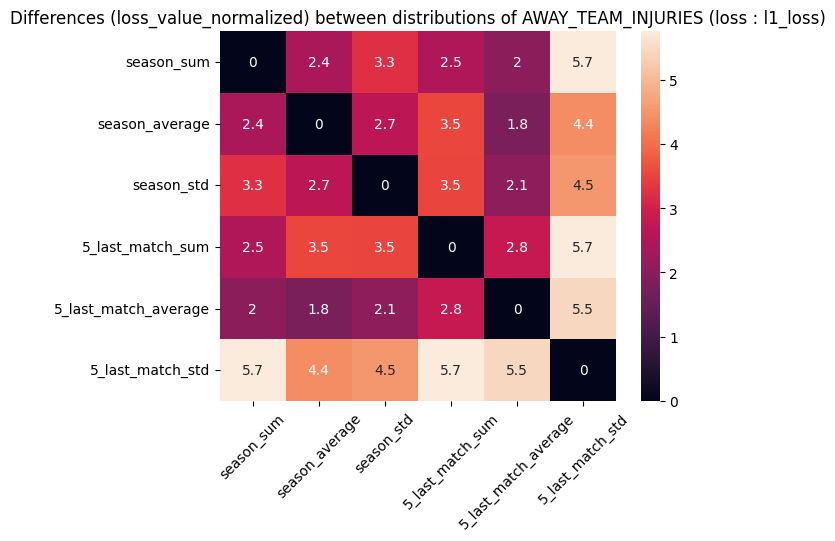

Metric: AWAY_TEAM_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


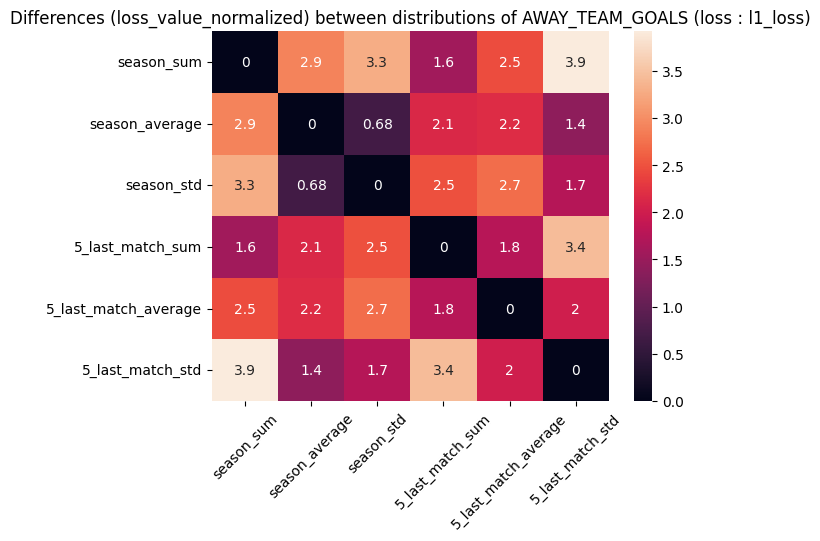

Metric: AWAY_TEAM_GAME_WON
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


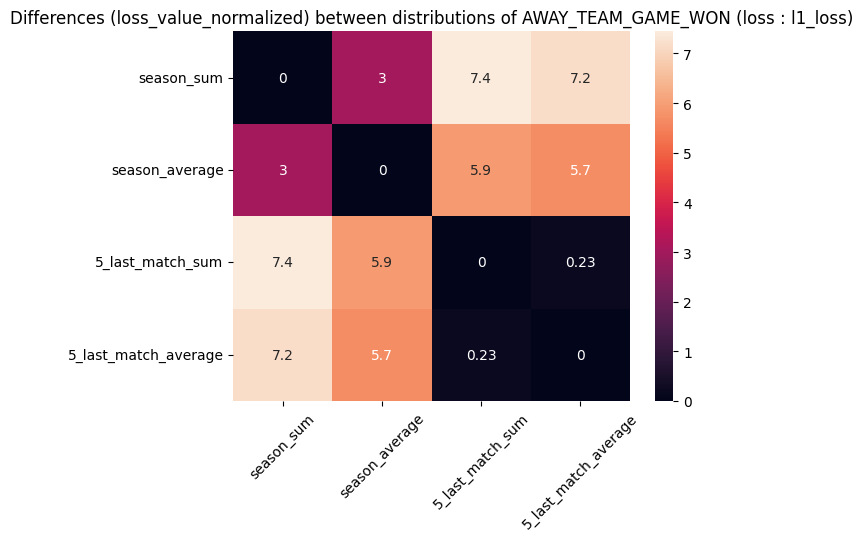

Metric: AWAY_TEAM_GAME_DRAW
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


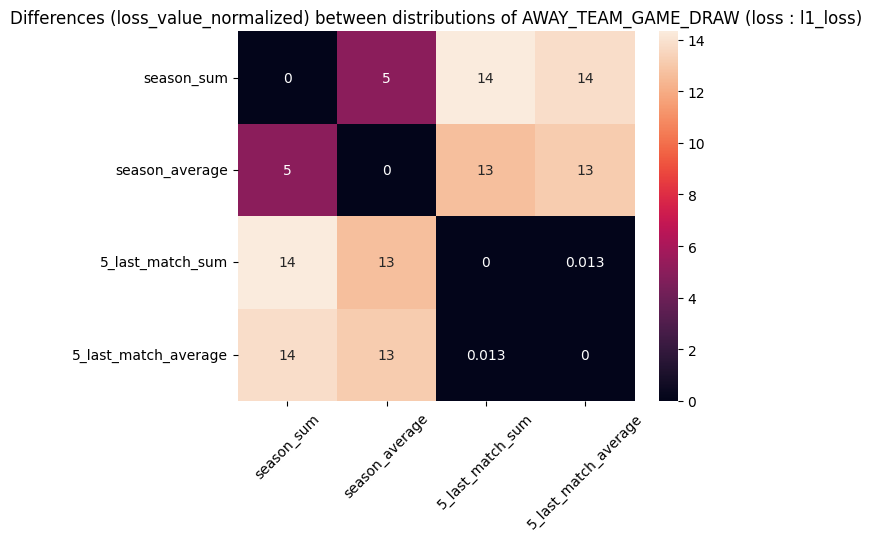

Metric: AWAY_TEAM_GAME_LOST
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


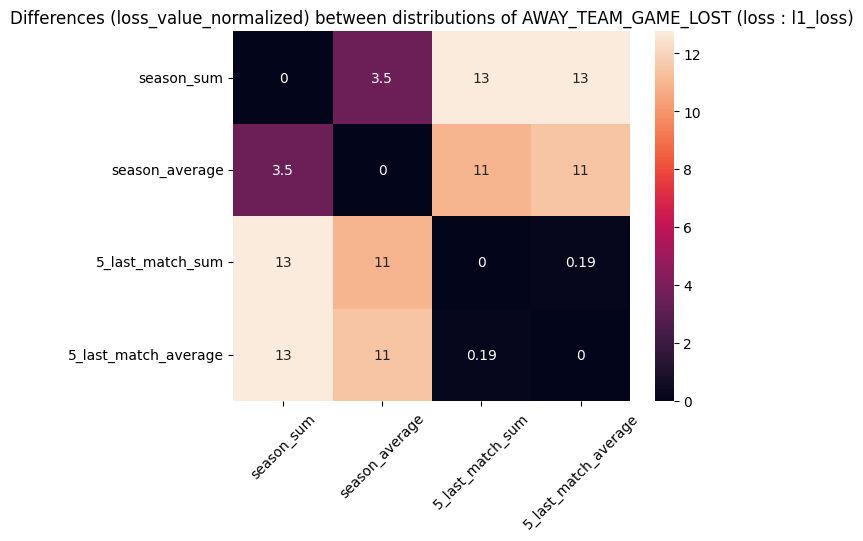

Metric: AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


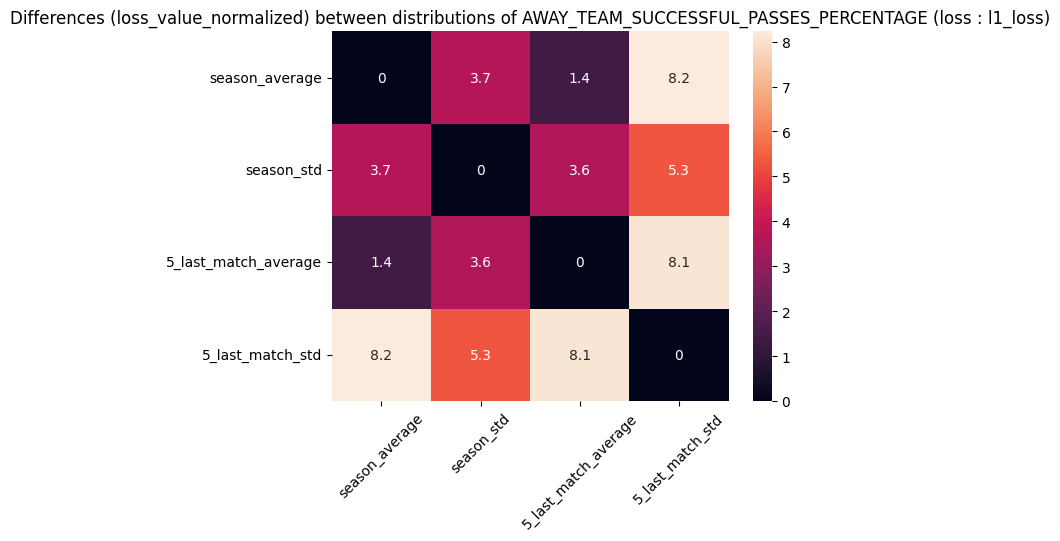

Metric: AWAY_TEAM_BALL_POSSESSION
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


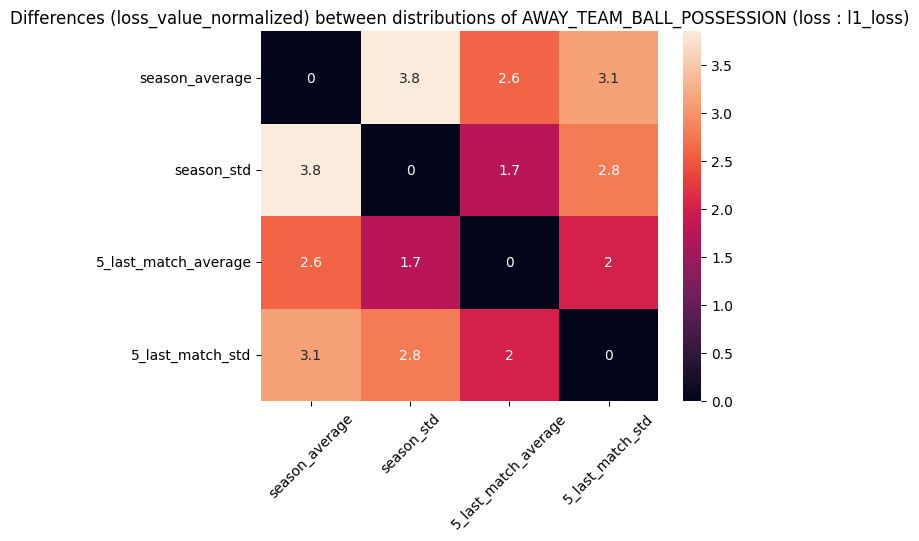

In [22]:
from data_analysis import get_metrics_names_to_fn_names, non_aggregated_teammetric_names, loss_name_to_loss_fn

# For each metric, we compare the assiocated to it and plot the matrix of differences
LOSS_NAME = 'l1_loss'
assert LOSS_NAME in loss_name_to_loss_fn.keys()
LOSS_STATISTIC = 'loss_value_normalized'
assert LOSS_STATISTIC in ['loss_value', 'loss_value_normalized', 'estimated_typical_loss_value']

teammetrics_names_to_fn_names = get_metrics_names_to_fn_names(df_teamfeatures_train)

for metric_name in [metric_name for metric_name in teammetrics_names_to_fn_names.keys() if metric_name not in non_aggregated_teammetric_names]:
    print(f"Metric: {metric_name}")
    column_names = teammetrics_names_to_fn_names[metric_name]
    n_columns = len(column_names)
    print(f"Aggregate function names: {column_names}")
    matrix_of_differences = np.zeros((len(column_names), len(column_names)))
    
    for i in range(n_columns):
        for j in range(i, n_columns):
            aggregate_function_name1 = column_names[i]
            aggregate_function_name2 = column_names[j]
            loss_name_to_loss_values = compute_distribution_difference(
                feature_serie1=df_teamfeatures_train[f'{metric_name}_{aggregate_function_name1}'],
                feature_serie2=df_teamfeatures_train[f'{metric_name}_{aggregate_function_name2}'],
                n_value_max=10,
                n_monte_carlo=50,
                normalization_method='mc_estimated_loss',
            )
            l1_loss_value = loss_name_to_loss_values[LOSS_NAME][LOSS_STATISTIC]
            matrix_of_differences[i, j] = l1_loss_value
            matrix_of_differences[j, i] = l1_loss_value
    fig, ax = plt.subplots()
    sns.heatmap(matrix_of_differences, annot=True, ax=ax)
    ax.set_xticklabels(column_names, rotation=45)
    ax.set_yticklabels(column_names, rotation=0)
    ax.set_title(f"Differences ({LOSS_STATISTIC}) between distributions of {metric_name} (loss : {LOSS_NAME})")
    plt.show()
 

## Player features

We plot the difference matrix (in terms of normalized L1 difference) of the different aggregated features related to the same metric. We plot such a matrix for each metric.

We only evaluated it for train home data.

In [23]:
from data_loading import load_dataframe_playersfeatures
df_playerfeatures_train_home, _ = load_dataframe_playersfeatures('train')

In [24]:
# Example of distribution difference

from data_analysis import compute_distribution_difference

metric_name = 'PLAYER_ACCURATE_CROSSES'
compute_distribution_difference(
    feature_serie1=df_playerfeatures_train_home[f'{metric_name}_season_sum'],
    feature_serie2=df_playerfeatures_train_home[f'{metric_name}_season_average'],
    n_value_max=100,
    n_monte_carlo=200,
)

{'l1_loss': {'loss_value': 0.0007902728699323759,
  'estimated_typical_loss_value': 0.0018597524752475261,
  'loss_value_normalized': 0.42493443641046863},
 'l2_loss': {'loss_value': 4.299578735256781e-06,
  'estimated_typical_loss_value': 1.5048217821782186e-05,
  'loss_value_normalized': 0.28572012886268366},
 'kl_divergence': {'loss_value': nan,
  'estimated_typical_loss_value': nan,
  'loss_value_normalized': nan},
 'sum_ratio_abs_diff': {'loss_value': 0.15228862561529924,
  'estimated_typical_loss_value': 489933672334.32776,
  'loss_value_normalized': 3.1083518895467634e-13}}

Metric: PLAYER_ACCURATE_CROSSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


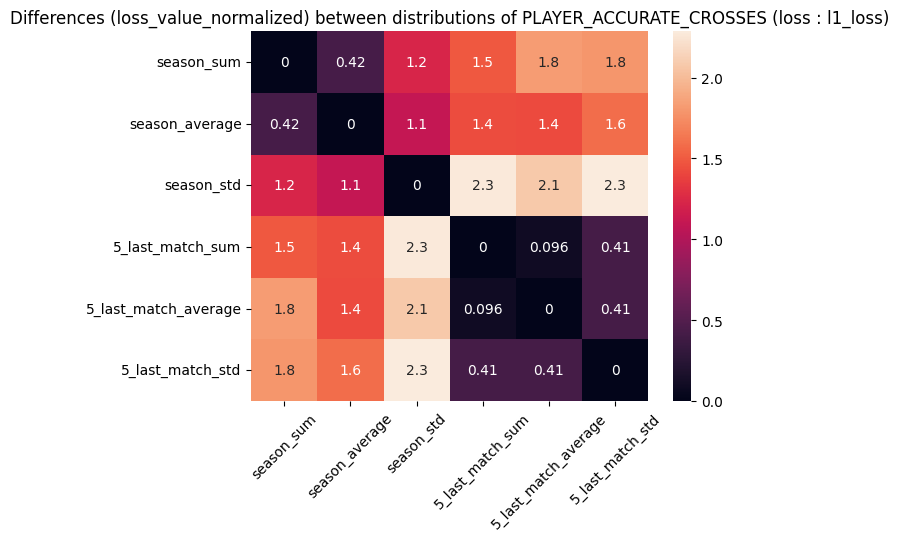

Metric: PLAYER_ACCURATE_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


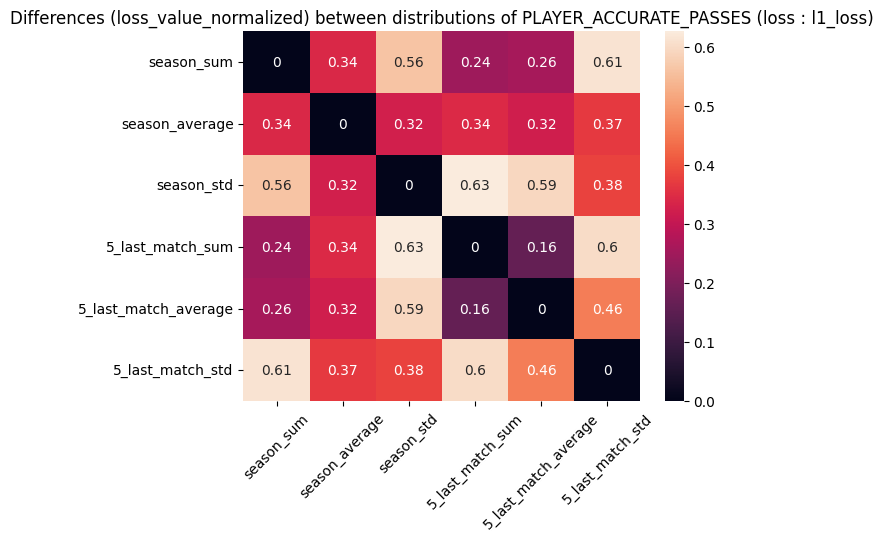

Metric: PLAYER_AERIALS_WON
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


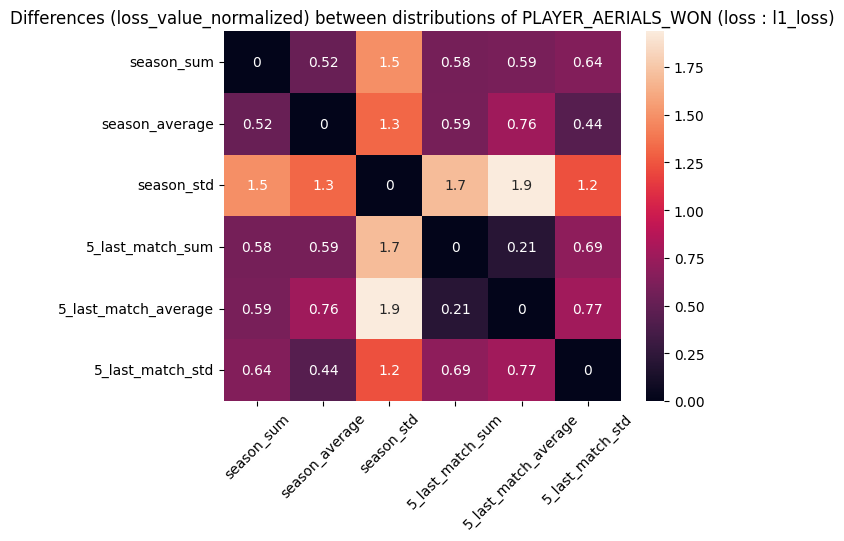

Metric: PLAYER_ASSISTS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


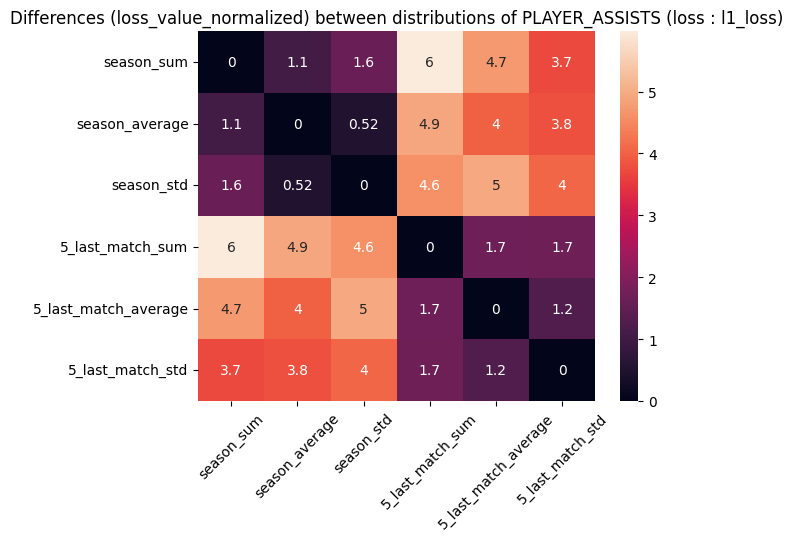

Metric: PLAYER_BIG_CHANCES_CREATED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


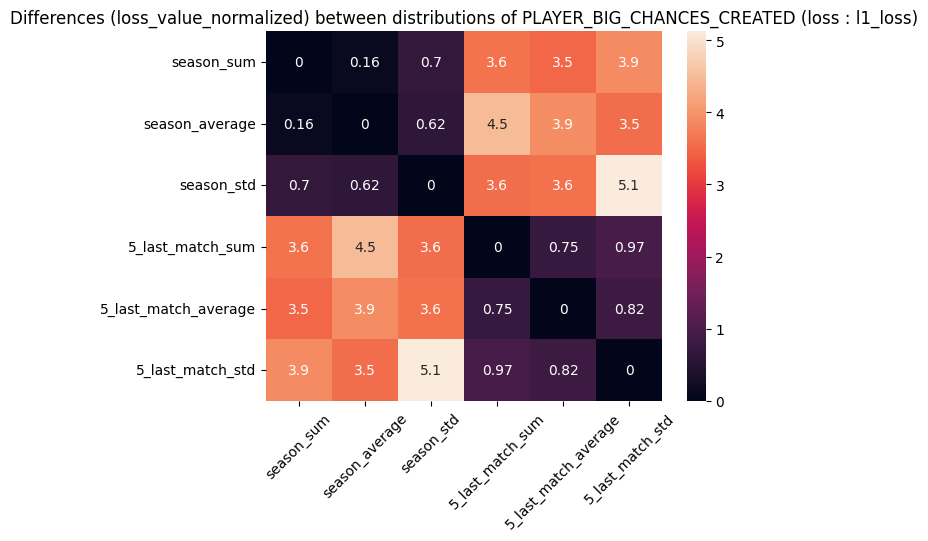

Metric: PLAYER_BIG_CHANCES_MISSED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


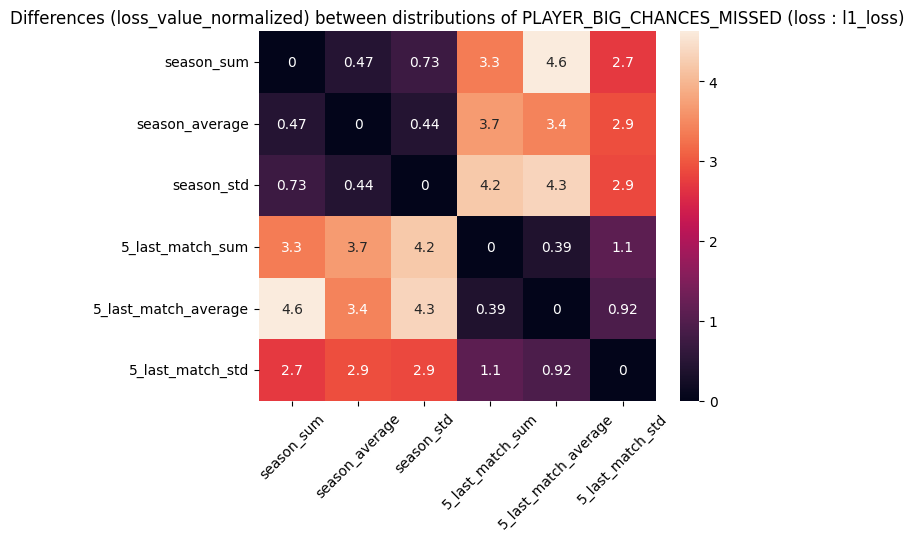

Metric: PLAYER_BLOCKED_SHOTS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


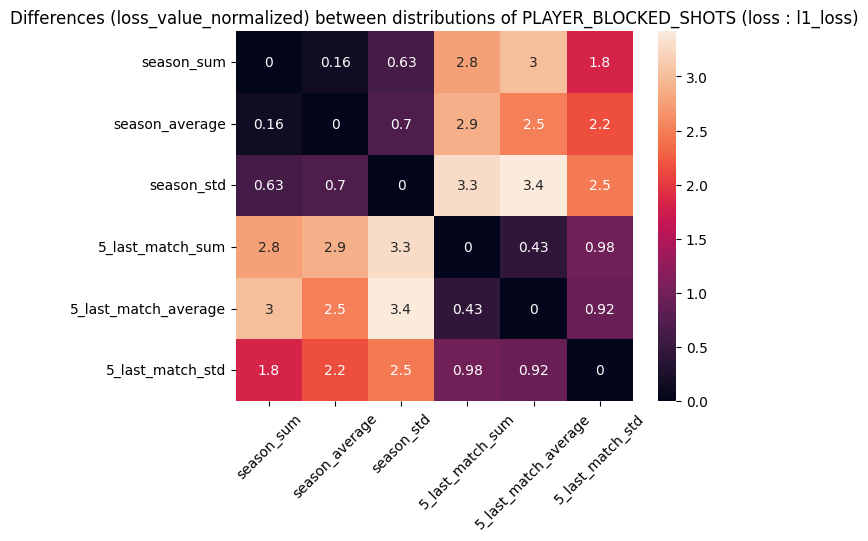

Metric: PLAYER_CAPTAIN
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


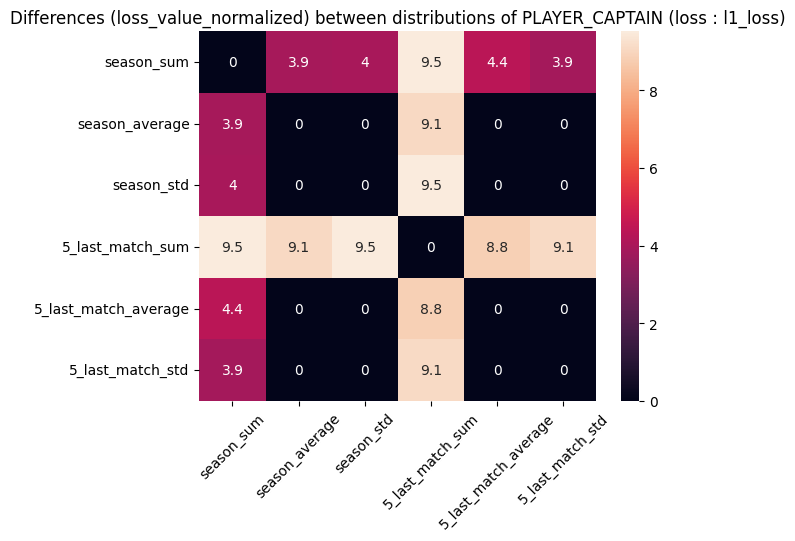

Metric: PLAYER_CLEARANCES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


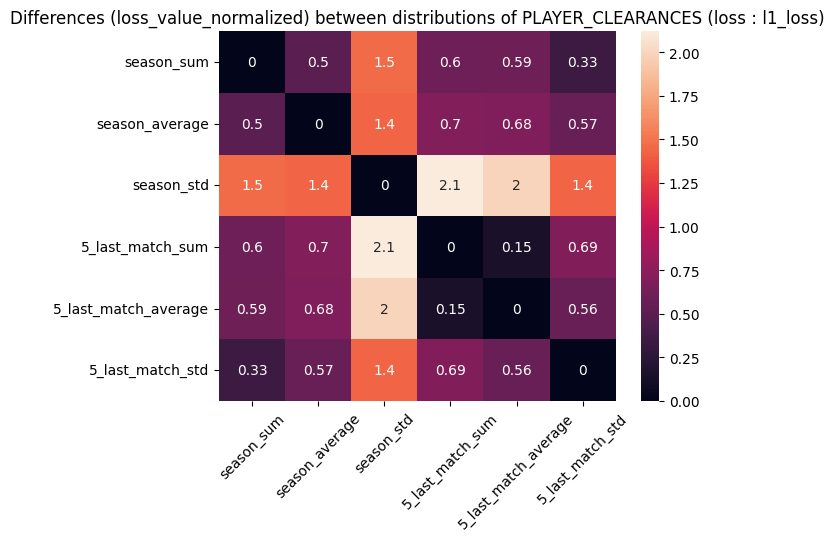

Metric: PLAYER_CLEARANCE_OFFLINE
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


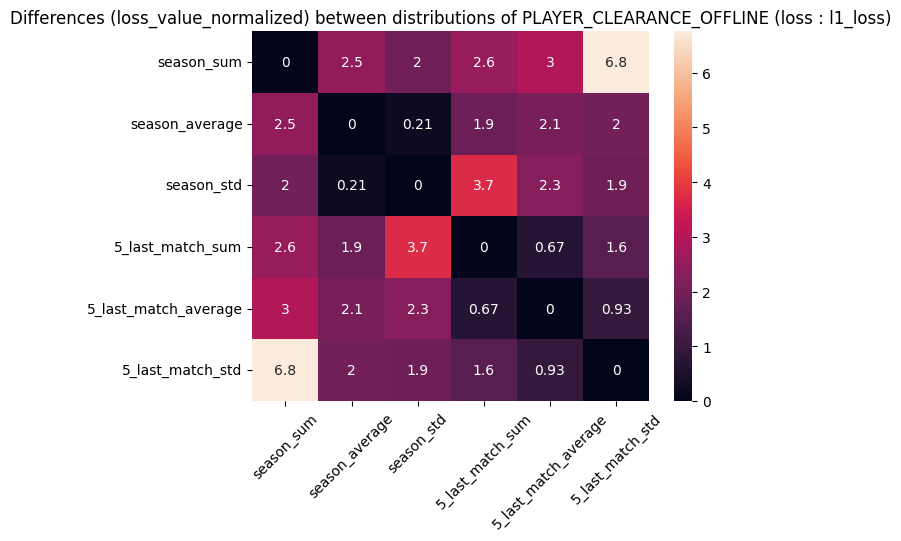

Metric: PLAYER_DISPOSSESSED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


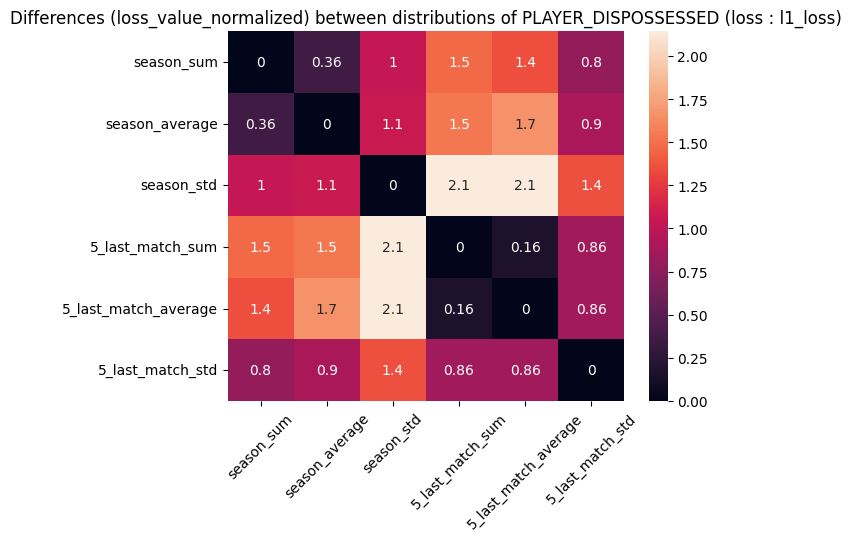

Metric: PLAYER_DRIBBLED_ATTEMPTS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


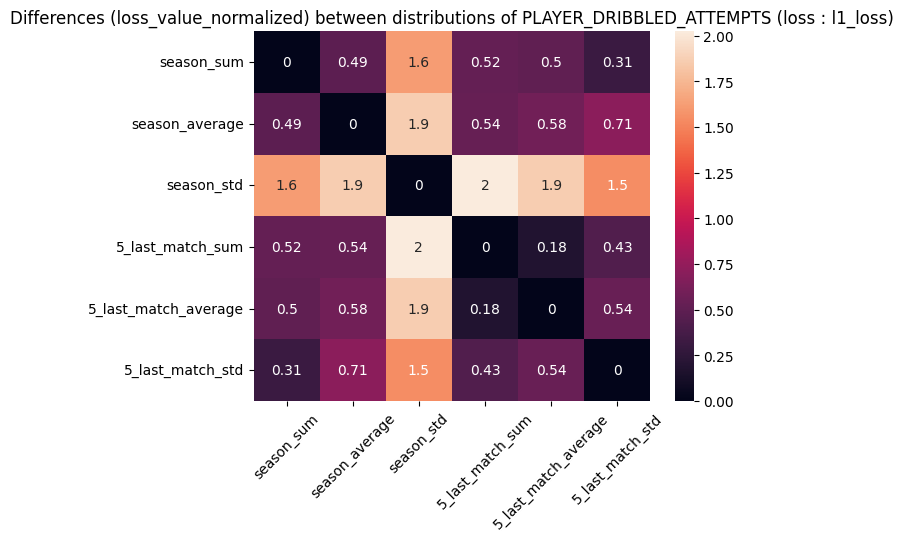

Metric: PLAYER_DRIBBLED_PAST
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


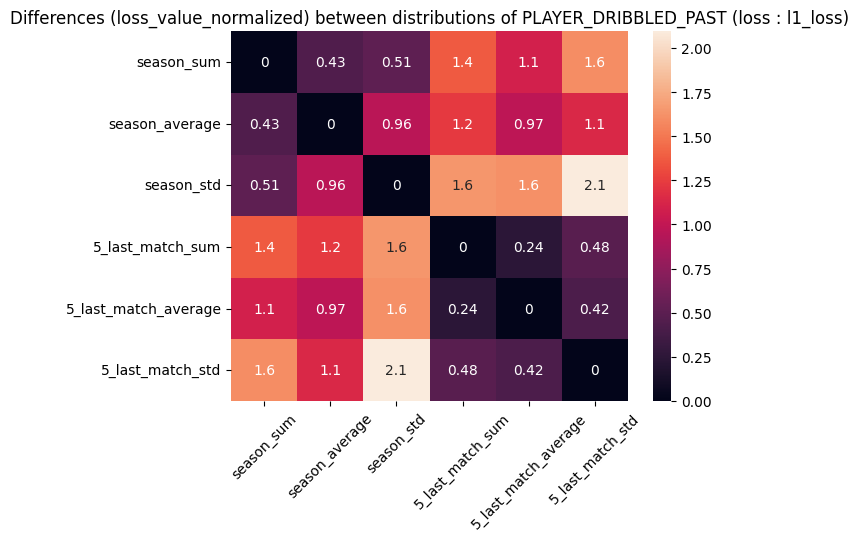

Metric: PLAYER_DUELS_LOST
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


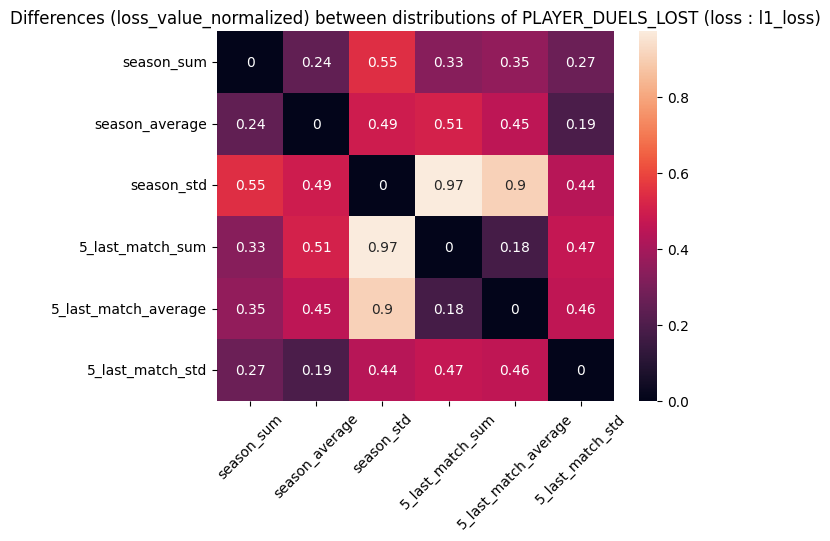

Metric: PLAYER_DUELS_WON
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


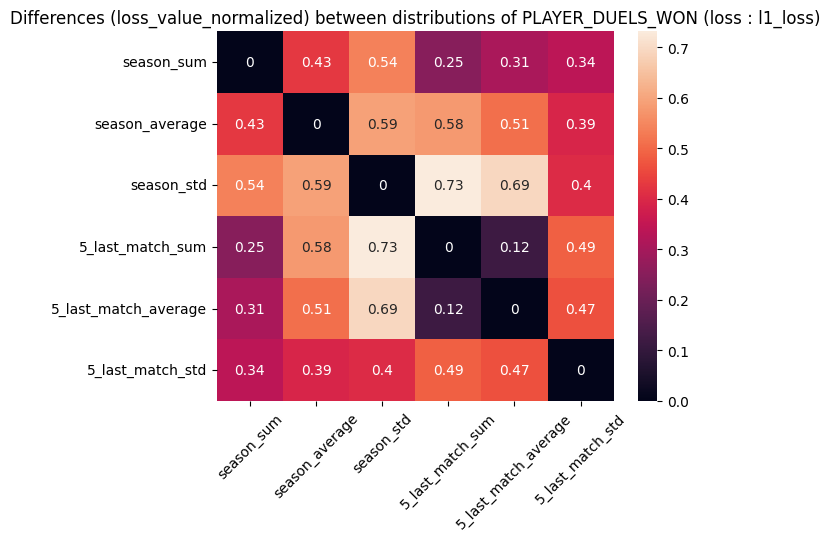

Metric: PLAYER_ERROR_LEAD_TO_GOAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


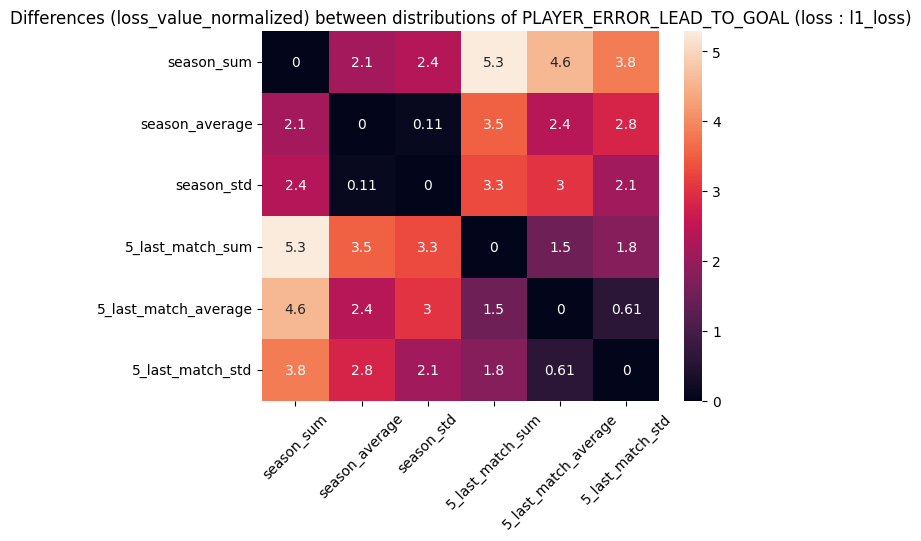

Metric: PLAYER_FOULS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


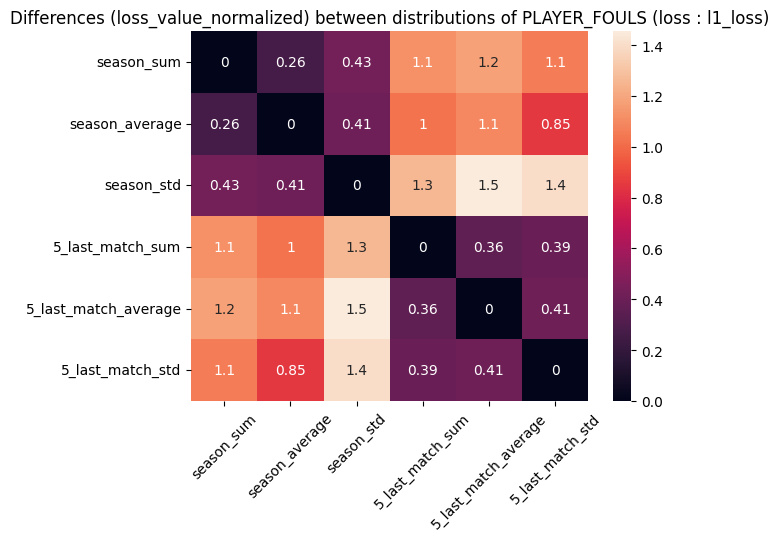

Metric: PLAYER_FOULS_DRAWN
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


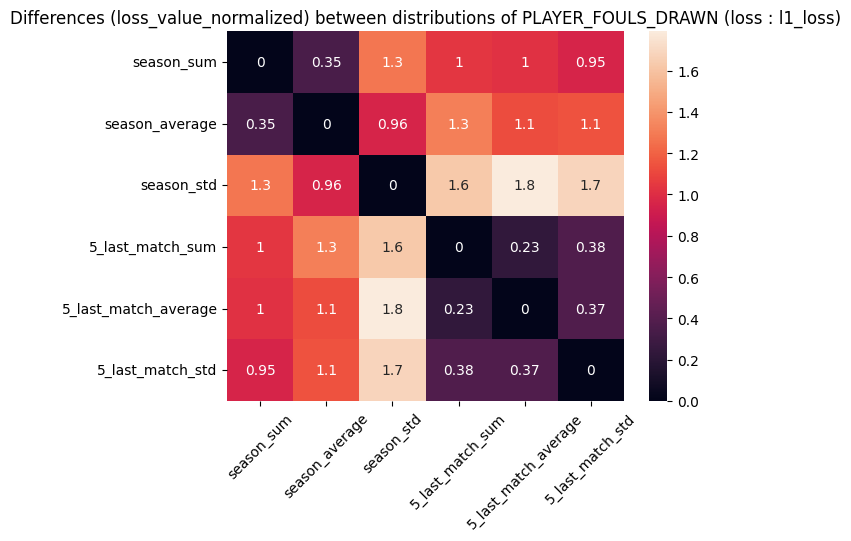

Metric: PLAYER_GOALKEEPER_GOALS_CONCEDED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


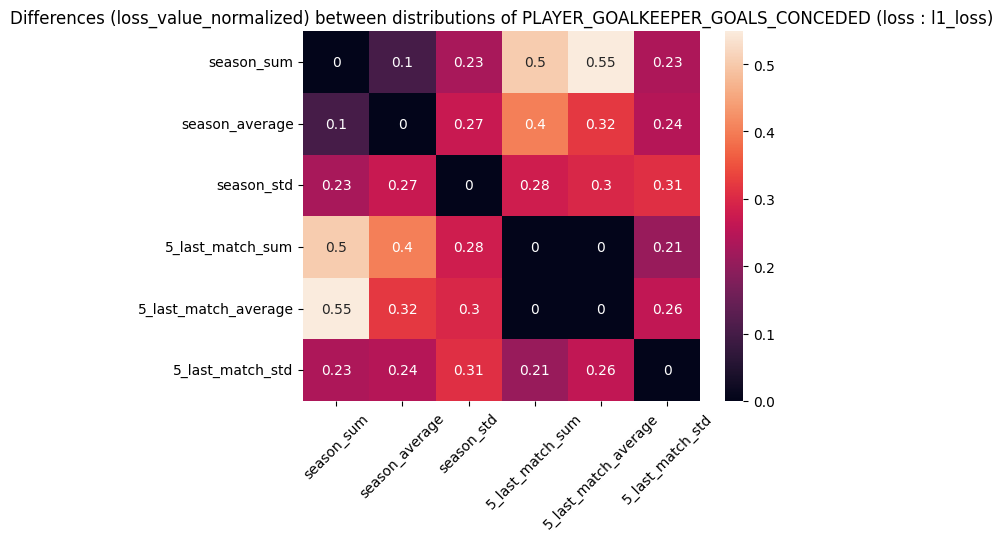

Metric: PLAYER_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


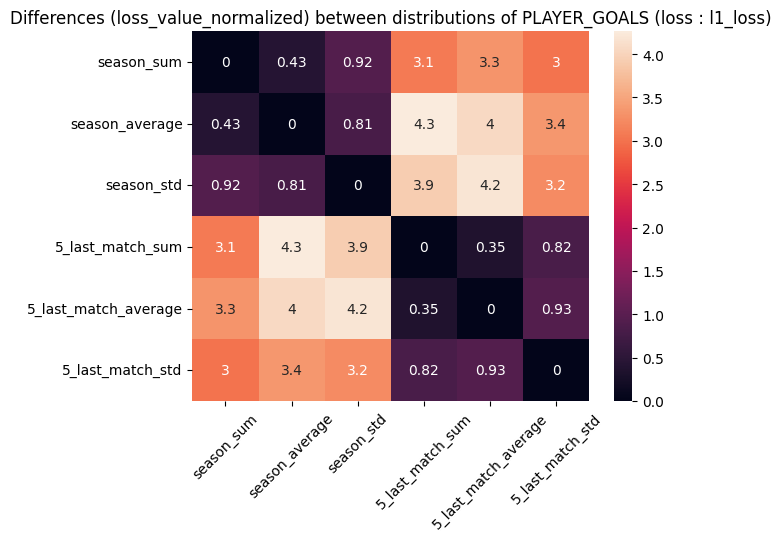

Metric: PLAYER_GOALS_CONCEDED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


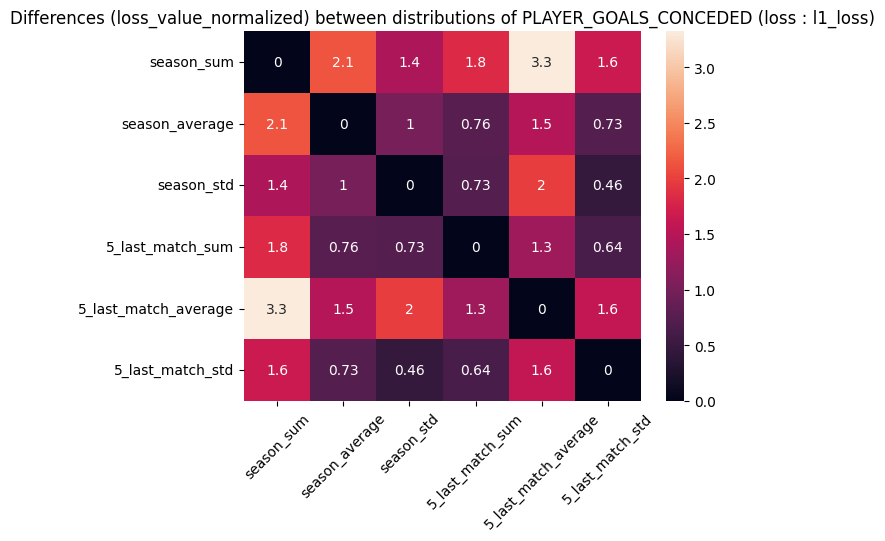

Metric: PLAYER_HIT_WOODWORK
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


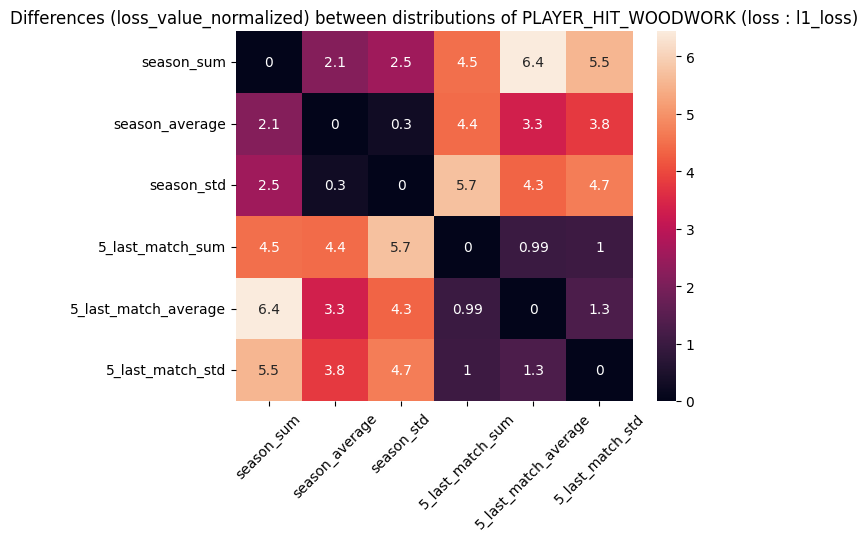

Metric: PLAYER_INTERCEPTIONS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


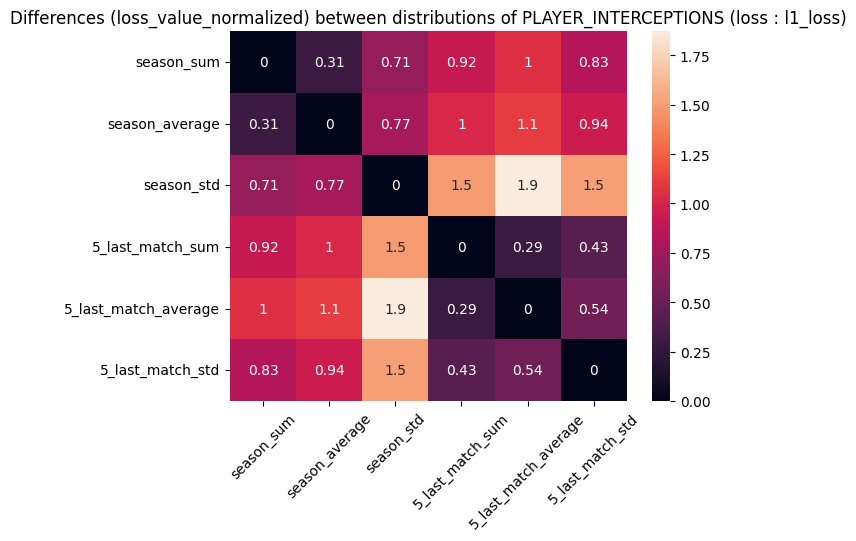

Metric: PLAYER_KEY_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


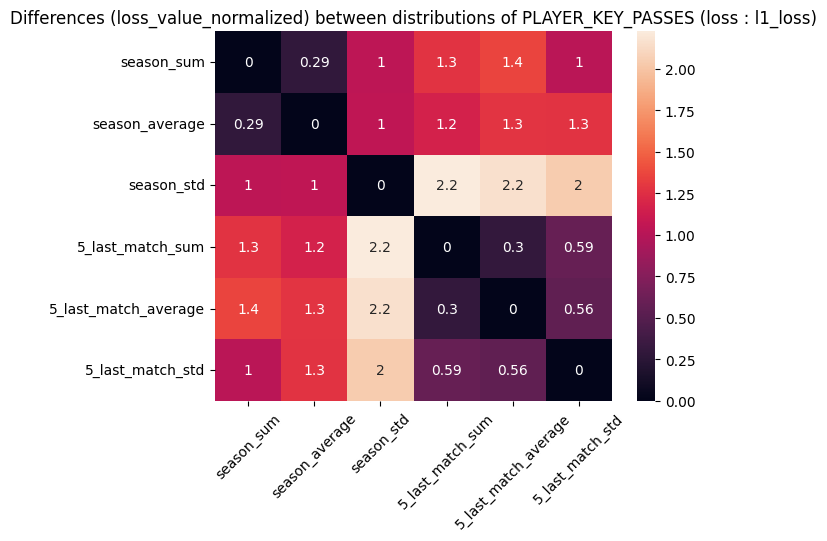

Metric: PLAYER_MINUTES_PLAYED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


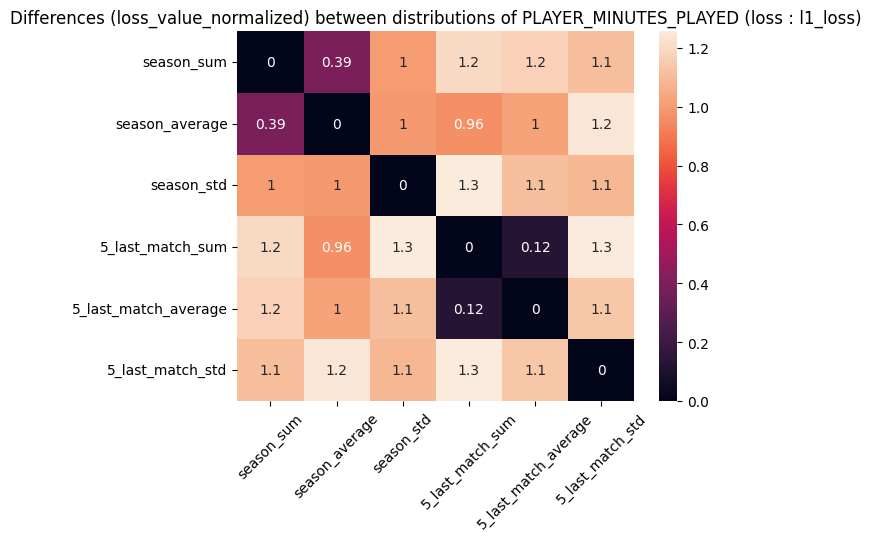

Metric: PLAYER_OFFSIDES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


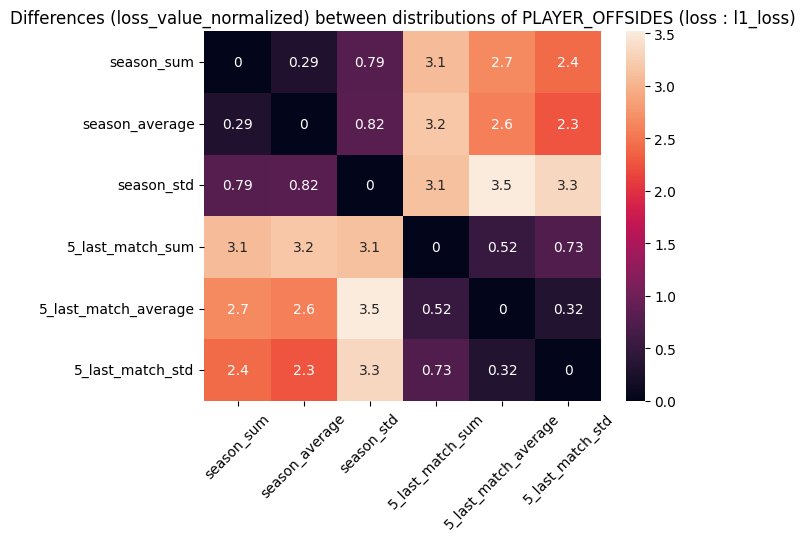

Metric: PLAYER_OWN_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


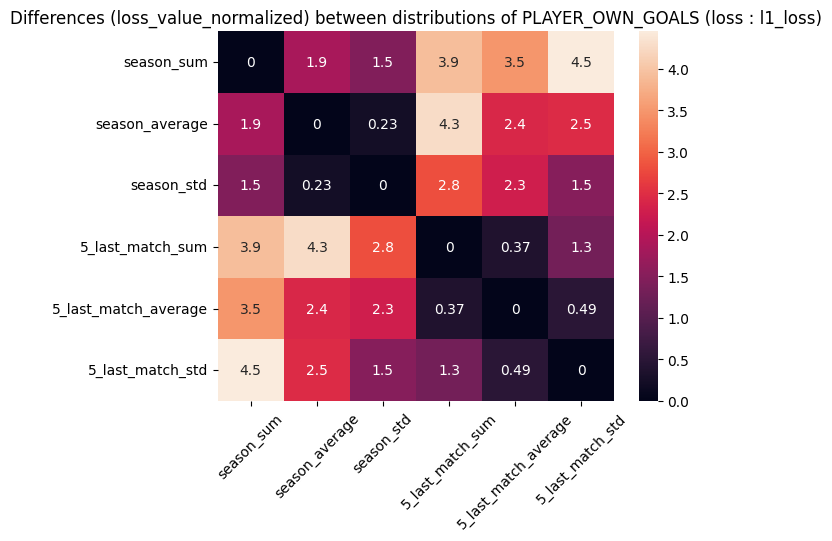

Metric: PLAYER_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


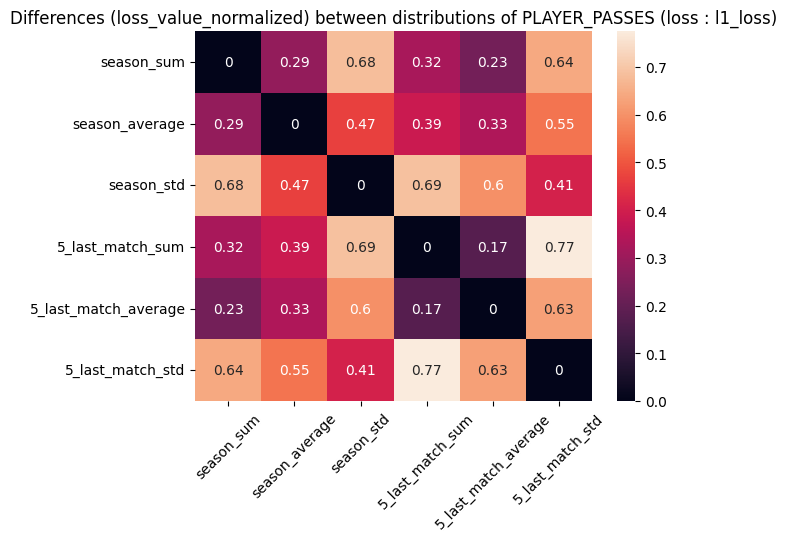

Metric: PLAYER_PENALTIES_COMMITTED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


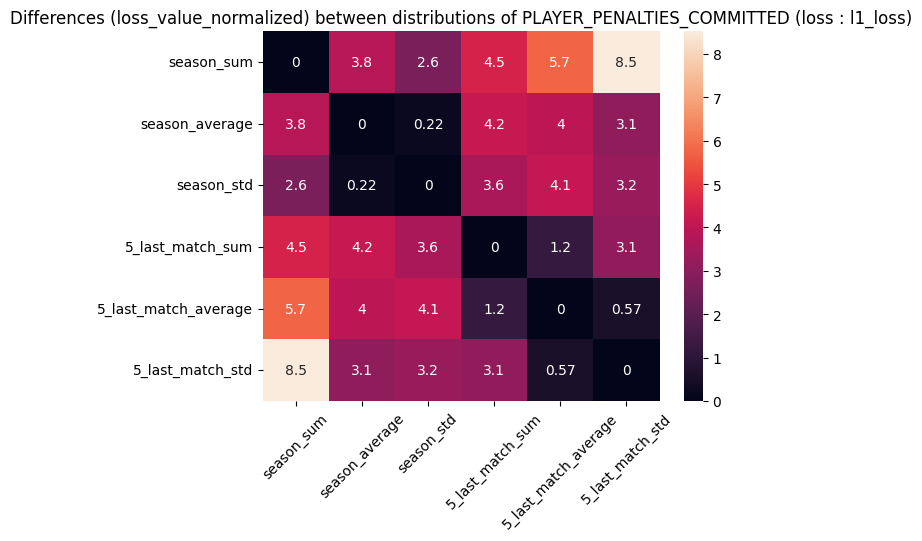

Metric: PLAYER_PENALTIES_MISSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


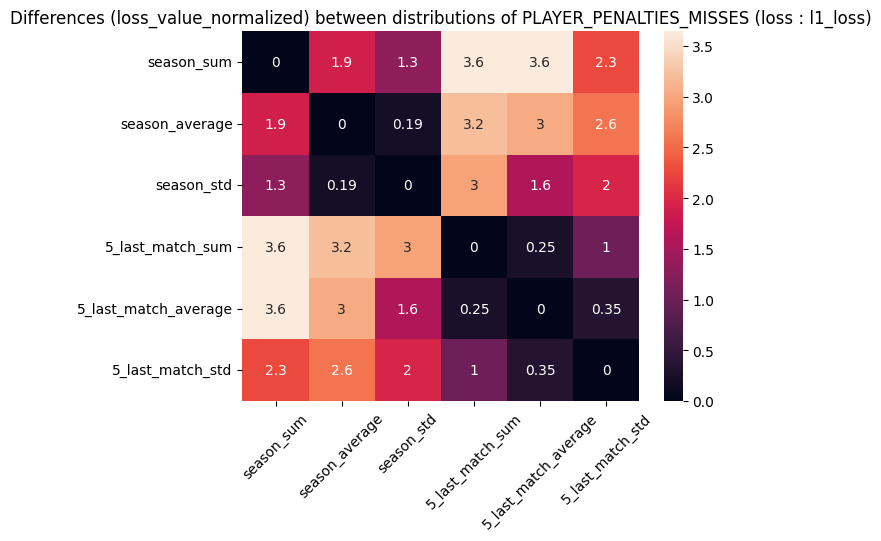

Metric: PLAYER_PENALTIES_SAVED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


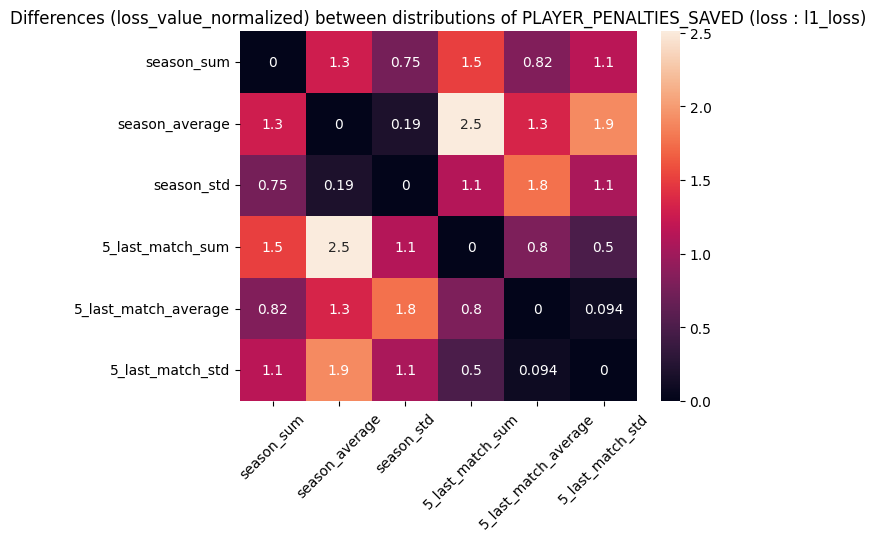

Metric: PLAYER_PENALTIES_SCORED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


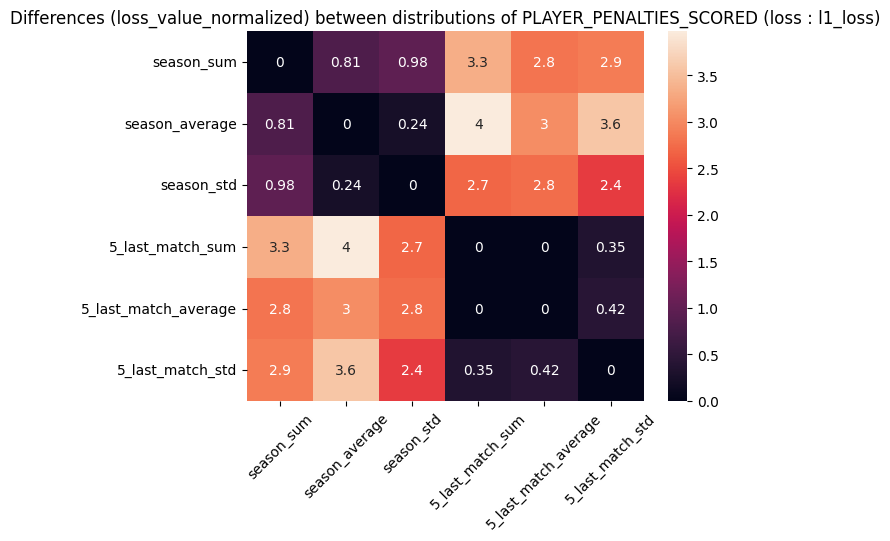

Metric: PLAYER_PENALTIES_WON
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


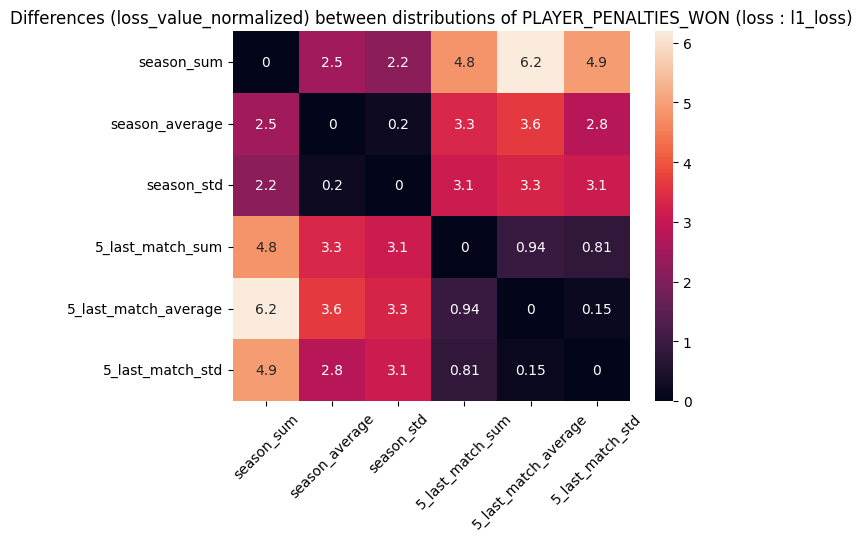

Metric: PLAYER_REDCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


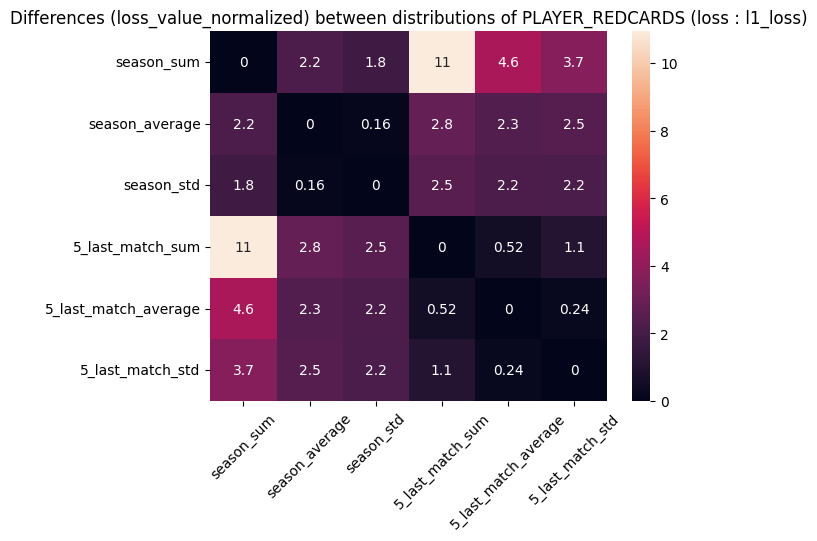

Metric: PLAYER_SAVES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


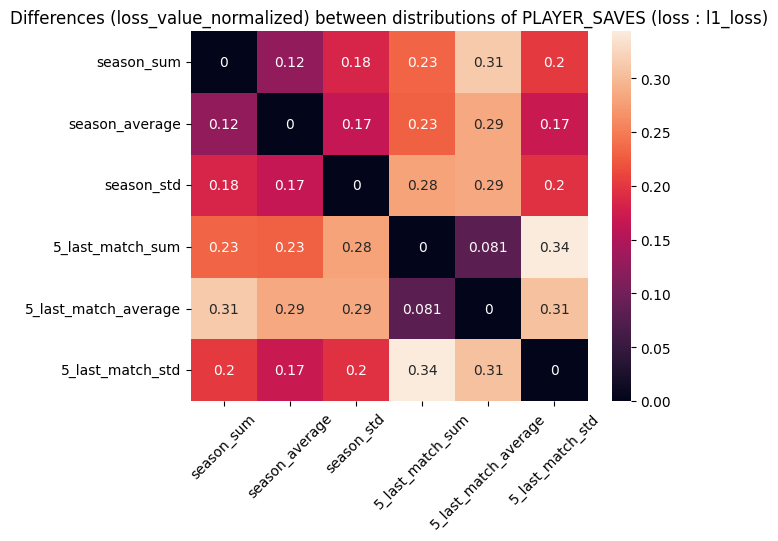

Metric: PLAYER_SAVES_INSIDE_BOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


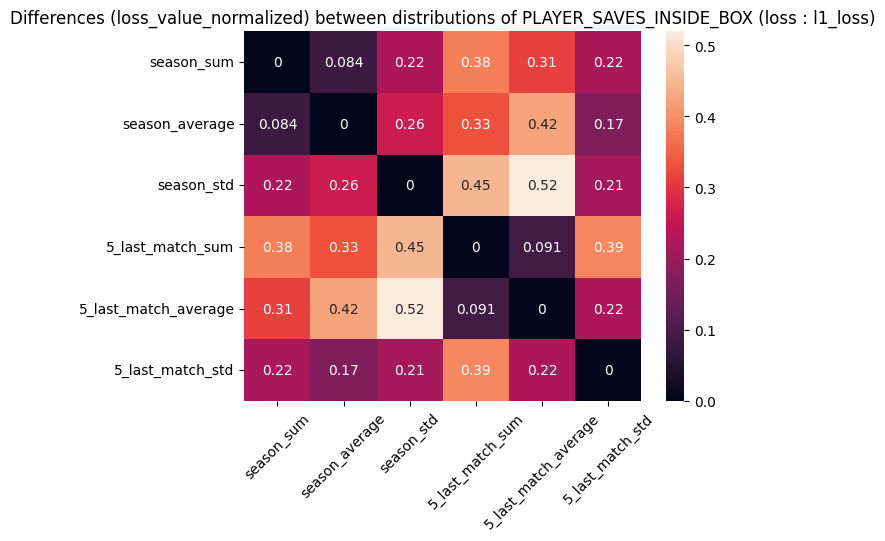

Metric: PLAYER_SHOTS_BLOCKED
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


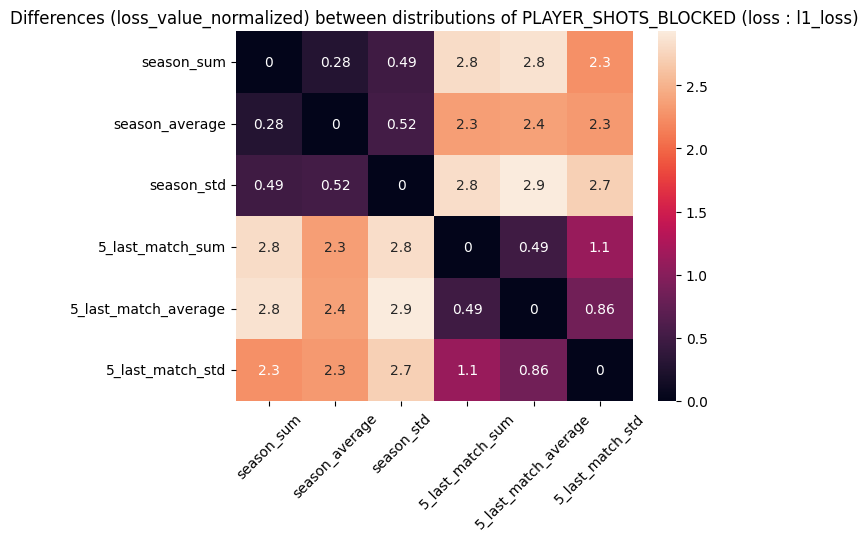

Metric: PLAYER_SHOTS_ON_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


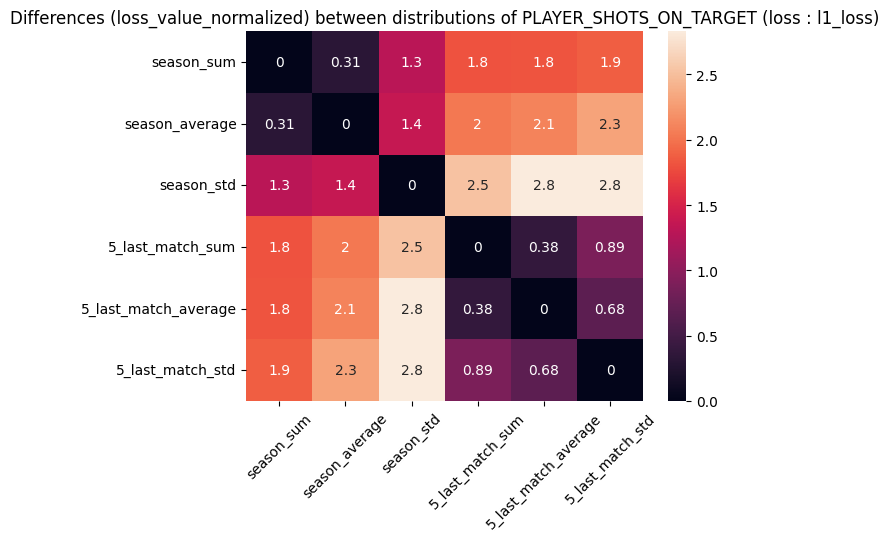

Metric: PLAYER_SHOTS_TOTAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


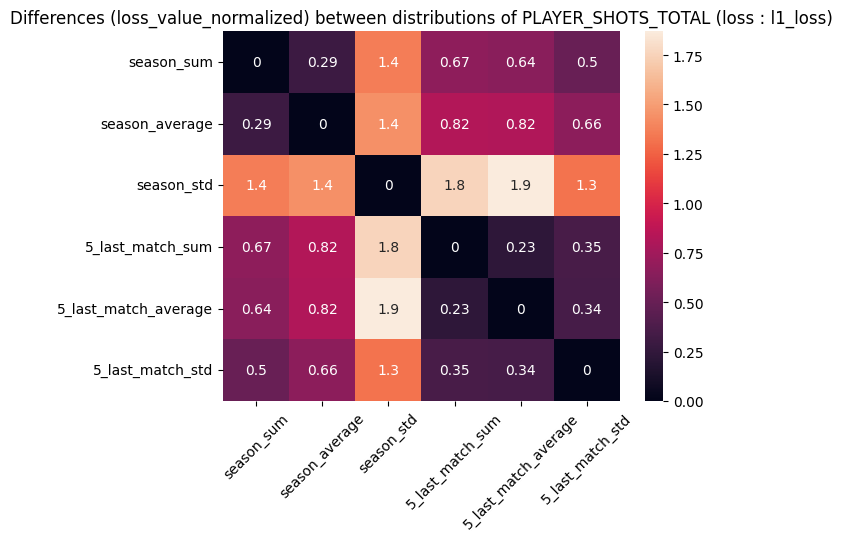

Metric: PLAYER_STARTING_LINEUP
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


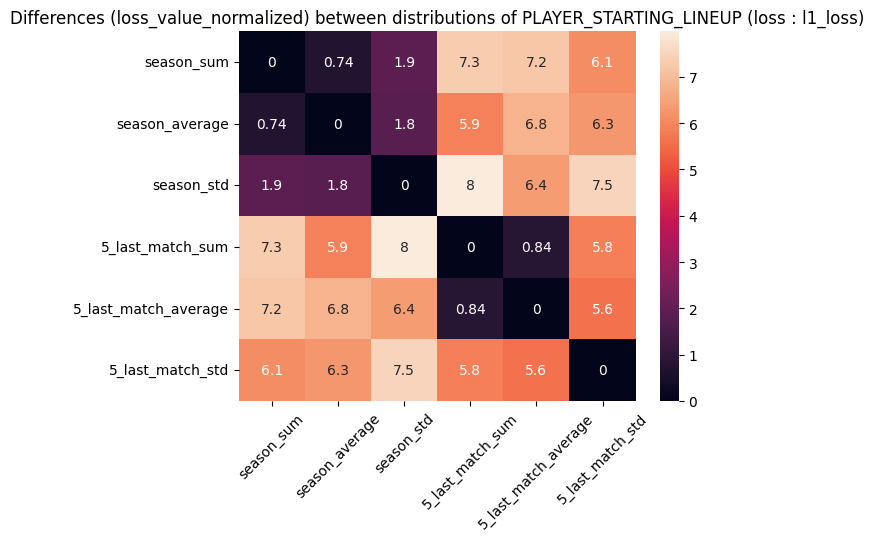

Metric: PLAYER_SUCCESSFUL_DRIBBLES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


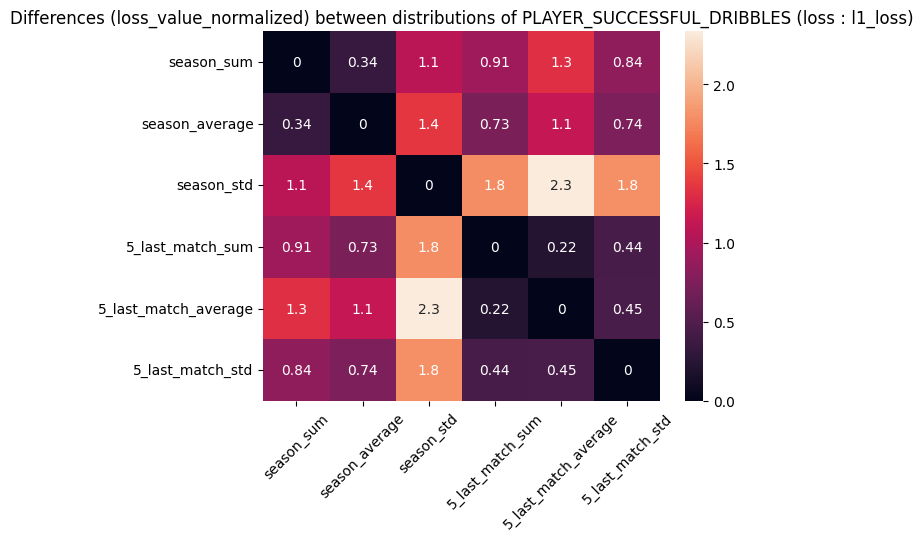

Metric: PLAYER_TACKLES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


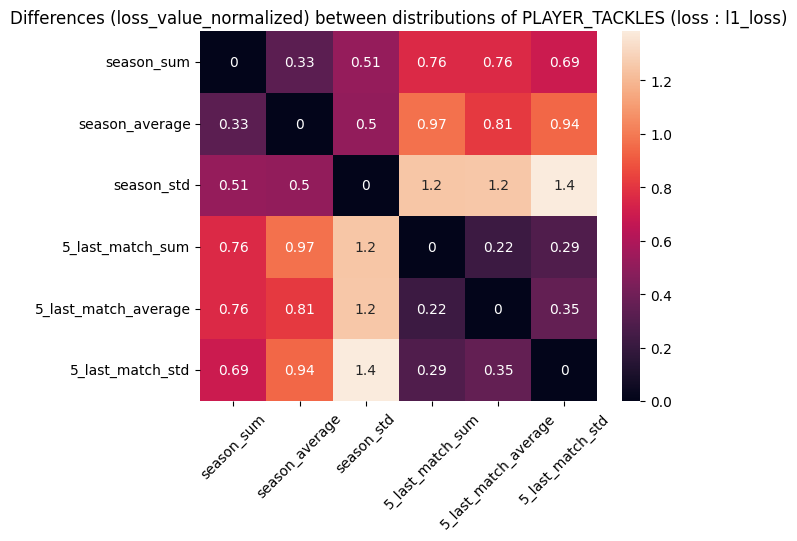

Metric: PLAYER_TOTAL_CROSSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


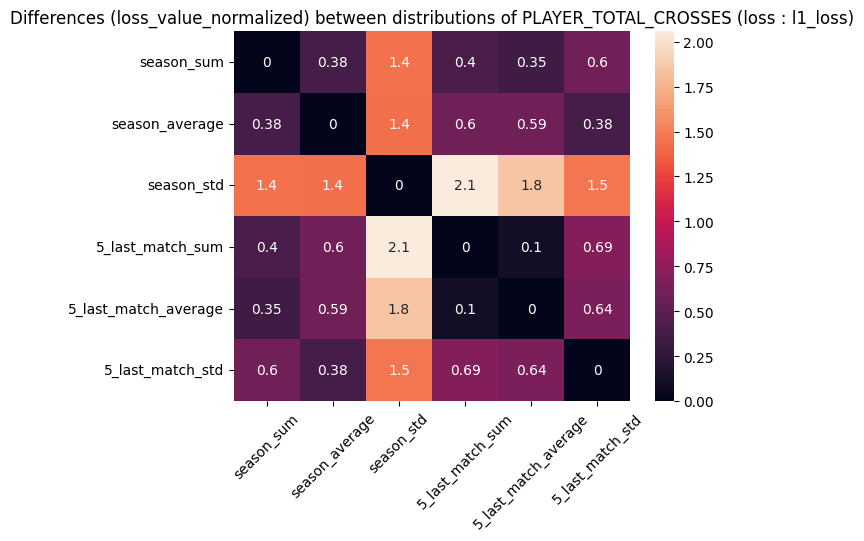

Metric: PLAYER_TOTAL_DUELS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


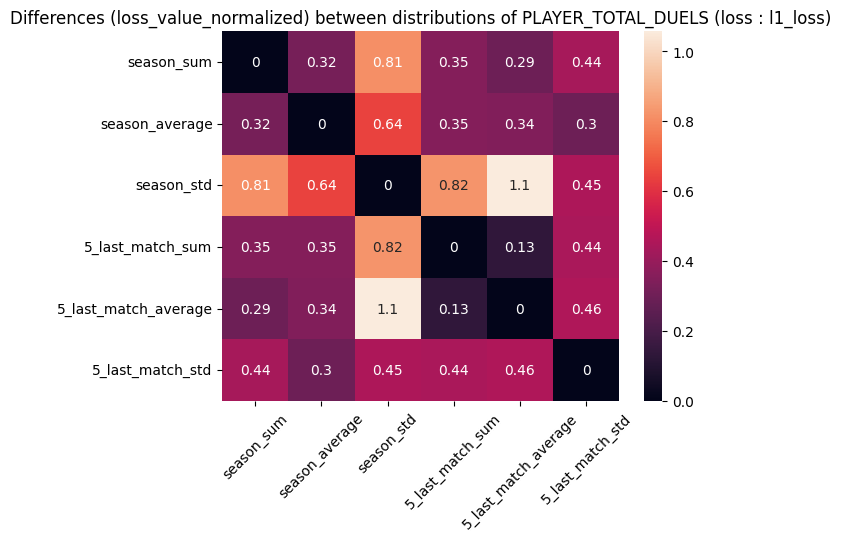

Metric: PLAYER_YELLOWCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


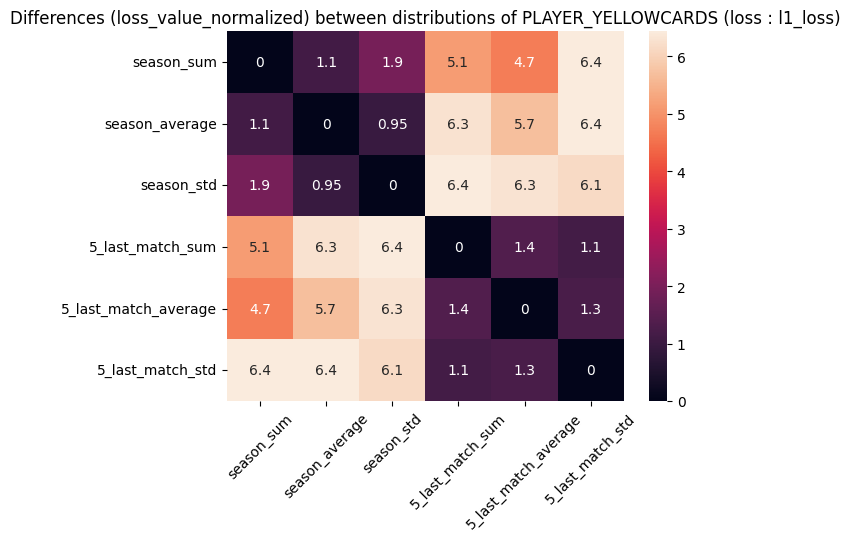

Metric: PLAYER_PUNCHES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


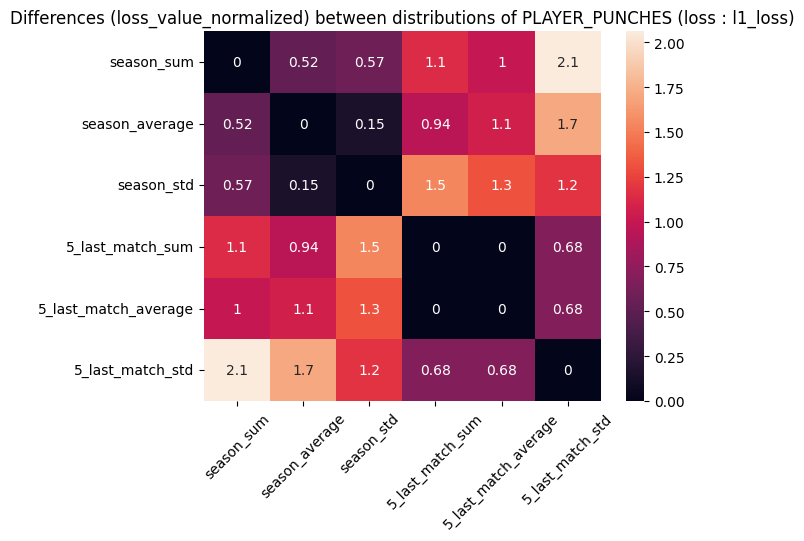

Metric: PLAYER_LONG_BALLS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


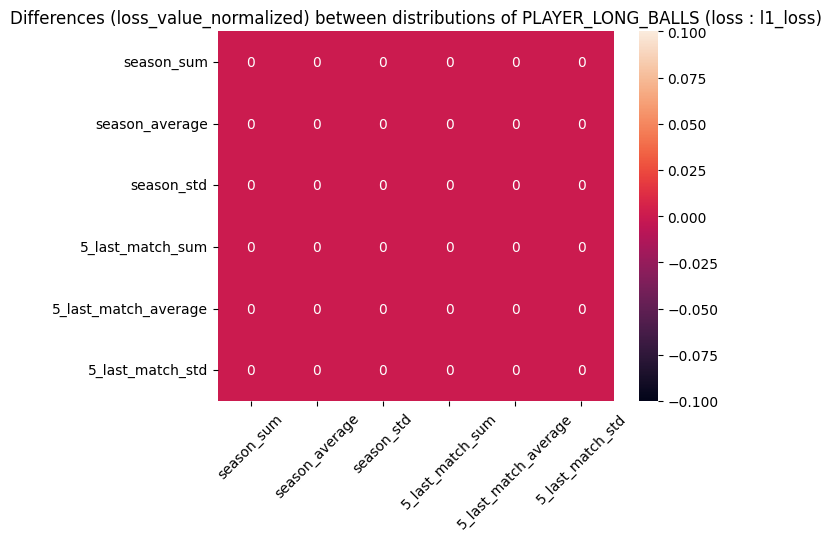

Metric: PLAYER_LONG_BALLS_WON
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


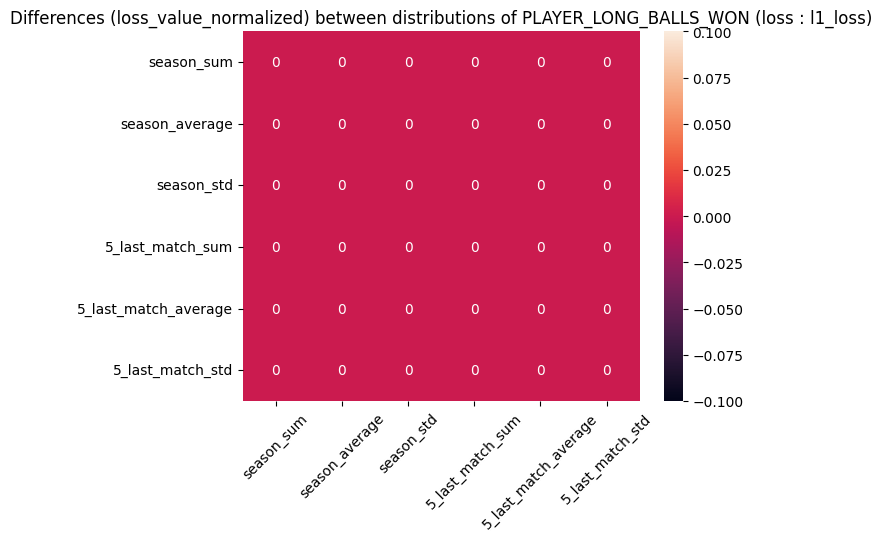

Metric: PLAYER_SHOTS_OFF_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


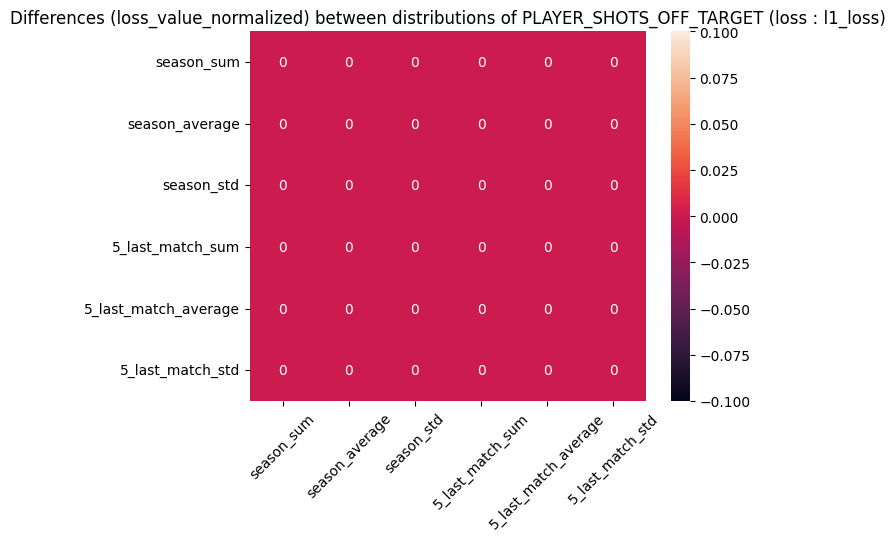

Metric: PLAYER_ACCURATE_PASSES_PERCENTAGE
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


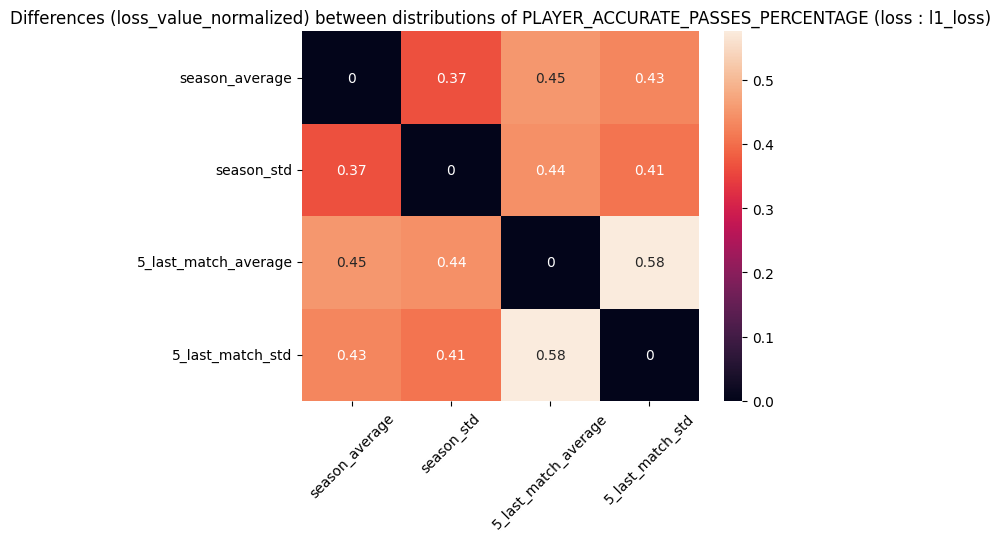

Metric: PLAYER_RATING
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


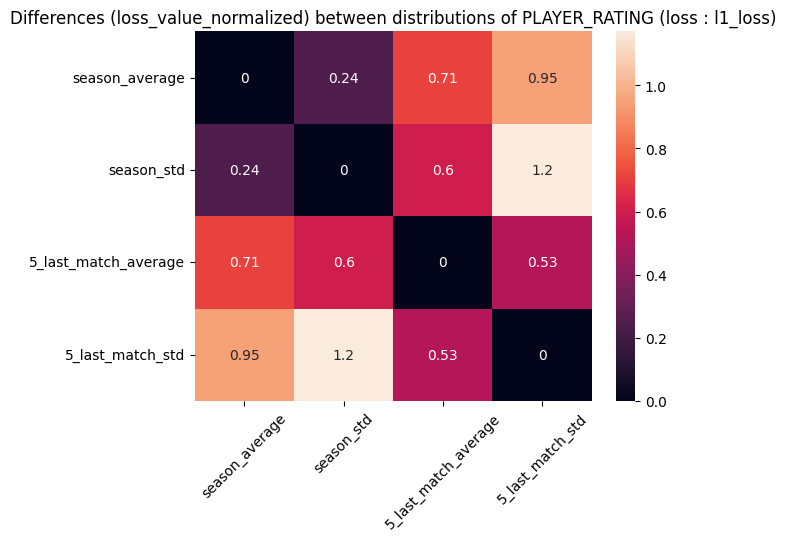

In [25]:
from data_analysis import get_metrics_names_to_fn_names, non_aggregated_playermetric_names, loss_name_to_loss_fn

# For each metric, we compare the assiocated to it and plot the matrix of differences
LOSS_NAME = 'l1_loss'
assert LOSS_NAME in loss_name_to_loss_fn.keys()
LOSS_STATISTIC = 'loss_value_normalized'
assert LOSS_STATISTIC in ['loss_value', 'loss_value_normalized', 'estimated_typical_loss_value']

playermetrics_names_to_fn_names = get_metrics_names_to_fn_names(df_playerfeatures_train_home)

for metric_name in [metric_name for metric_name in playermetrics_names_to_fn_names.keys() if metric_name not in non_aggregated_playermetric_names]:
    print(f"Metric: {metric_name}")
    column_names = playermetrics_names_to_fn_names[metric_name]
    n_columns = len(column_names)
    print(f"Aggregate function names: {column_names}")
    matrix_of_differences = np.zeros((len(column_names), len(column_names)))
    
    for i in range(n_columns):
        for j in range(i, n_columns):
            aggregate_function_name1 = column_names[i]
            aggregate_function_name2 = column_names[j]
            loss_name_to_loss_values = compute_distribution_difference(
                feature_serie1=df_playerfeatures_train_home[f'{metric_name}_{aggregate_function_name1}'],
                feature_serie2=df_playerfeatures_train_home[f'{metric_name}_{aggregate_function_name2}'],
                n_value_max=100,
                n_monte_carlo=1,
                normalization_method='mc_estimated_loss',
            )
            l1_loss_value = loss_name_to_loss_values[LOSS_NAME][LOSS_STATISTIC]
            matrix_of_differences[i, j] = l1_loss_value
            matrix_of_differences[j, i] = l1_loss_value
    fig, ax = plt.subplots()
    sns.heatmap(matrix_of_differences, annot=True, ax=ax)
    ax.set_xticklabels(column_names, rotation=45)
    ax.set_yticklabels(column_names, rotation=0)
    ax.set_title(f"Differences ({LOSS_STATISTIC}) between distributions of {metric_name} (loss : {LOSS_NAME})")
    plt.show()